In [1]:
import matplotlib as plb
import numpy as np
import pickle
import time
import random
from random import uniform

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import der_snr
from PyAstronomy import pyasl
import io
#from astropy.io import fits
import skmultilearn
from skmultilearn.adapt import MLkNN
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 

from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial import distance_matrix 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

import h5py
from testCases_v4a import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

from PIL import Image
from scipy import ndimage

import tensorflow as tf 
from tensorflow.python.framework import ops
from cnn_utils import *
from scipy import interpolate
import keras
from keras.utils import to_categorical

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
from sklearn.svm import LinearSVR

from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import RegressorChain

from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.utils import plot_model
from keras.layers import Input
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

import tensorflow as tf
#from tensorflow import keras
#import keras
from keras.models import Sequential
from keras.layers import Dense
#from tensorflow.keras import layers
import linecache
import functools
import os
from pylab import *
import subprocess
import sys
from numpy import linalg as LA
#from astropy.stats import sigma_clip as sgc 
import pylab as p
%matplotlib inline


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
Dumpfiles=["Database/Dumpfile-4450-4990-7000-10000-200-2-5-0.5-vsini-0-300-met-0-Vmicr2-Resolution60000",\
           "Database/Dumpfile-Random-lambda4450.00-4989.95-teff7000.0-11000.0-logg2.00-5.00-vsini0-300-meta0-Vmicr2-Resolution60000",\
           "Database/Dumpfile-Random-medium-lambda4450.00-4989.95-teff7000.0-11000.0-logg2.00-5.00-vsini0-300-meta0-Vmicr2-Resolution60000",\
           "Database/Dumpfile-random-meta-22000spectrum",\
           "Database/Dumpfile-random-meta-37500spectrum",\
           "Database/Dumpfile-random-meta-62000spectrum",\
           "Database/Dumpfile-Random-small-lambda4450.00-4989.95-teff7000.0-11000.0-logg2.00-5.00-vsini0-300-meta0-Vmicr2-Resolution60000",\
           "Database/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.20-vsini0-300-meta0.00-0.00-0.50-Vmicr2.00-2.00-1.00-Resolution60000",\
           "Database/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.00-0.00-0.50-Vmicr2.00-2.00-1.00-Resolution60000",\
           "Database/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.00-0.00-0.50-Vmicr2.00-2.00-1.00-Resolution100000",\
           "Database/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.00-0.00-0.50-Vmicr2.00-2.00-1.00-Resolution25000",\
           "Database/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-500-logg2.00-5.00-0.50-vsini0-300-meta-1.50-1.50-0.50-Vmicr2.00-2.00-1.00-Resolution60000"]
Dump=Dumpfiles[3]
lamb=np.arange(4450.,4990,0.05)
print(Dump)
temp=np.loadtxt("Template/atSS02997-t009000g4.00-vrot000res060000-met+0.0-micr2.0s48.dat")

Database/Dumpfile-random-meta-22000spectrum


## Reading the Observations

# Unmark to run
#Resolution of 76000 
lamb=np.arange(4450.,4990,0.05)

temp=np.loadtxt("Template/Template-76000/atSS02497-t008500g3.50-vrot000res076000-met+0.0-micr2.0s48.dat")
c=3.0*10**5 #speed of light
lst=np.loadtxt("list_obs_75000",dtype=str)
Obs=np.zeros((len(lst),len(lamb)))


ii=0
lst=np.loadtxt("list_obs_75000_polar",dtype=str)

for star in lst:
    spec=np.loadtxt(star)
    spec[:,0]=10*spec[:,0]
    noise=der_snr.DER_SNR(spec[:,1])
    radialv, cc = pyasl.crosscorrRV(spec[:,0], spec[:,1], temp[:,0], temp[:,1], -100., 100., 0.1, skipedge=10)
    maxind = np.argmax(cc)
    plt.plot(spec[:,0], spec[:,1])
    wavelength=spec[:,0]*(1.-radialv[maxind]/c)
    interpfunc = interpolate.interp1d(wavelength,spec[:,1], kind='linear')
    flux=interpfunc(lamb)
    Obs[ii,:]=flux
    #    plt.plot(lamb,flux)
    print (ii,"- Cross-correlation function is maximized at dRV = ", radialv[maxind], \
           " km/s for", str(star), "with a noise of", round(noise,4))
    ii+=1
    
    
lst=np.loadtxt("list_obs_75000_Sophie",dtype=str)


lst=np.loadtxt("list_obs_noSNRV_meta",dtype=str)
Obs=np.zeros((len(lst),len(lamb)))
ii=0
for star in lst:
    spec=np.loadtxt(star)
    noise=der_snr.DER_SNR(spec[:,1])
    Obs[ii,:]=spec[:,1]
    ii+=1

np.savetxt("stackedspectra_noSNRV_meta.txt", Obs, fmt="%.9f")


## Putting all the observations in a Matrix

In [9]:
lst=np.loadtxt("list_obs_noSNRV_meta",dtype=str)

#f = open ( 'stackedspectra_noSNRV_meta.txt' , 'r')
#Observations = []
#Observations = np.array([ line.split() for line in f])
#Observations=Observations.astype(np.float)
Observations=np.loadtxt("stackedspectra_noSNRV_meta.txt",dtype=float)
Observations.shape

# list of spectra with SN 
#lst2=np.loadtxt("list_noisy",dtype=str)

#f2 = open ( 'stackedspectra_noisy.txt' , 'r')
#Observations2 = []
#Observations2 = np.array([ line.split() for line in f2])
#Observations2=Observations2.astype(np.float)
#Observations2.shape


# list of spectra with SN 
lst2=np.loadtxt("list_spectra_60000_meta",dtype=str)

#f2 = open ( 'stackedspectra_with_meta.txt' , 'r')
#Observations2 = []
#Observations2 = np.array([ line.split() for line in f2])
#Observations2=Observations2.astype(np.float)

Observations2=np.loadtxt("stackedspectra_with_meta.txt",dtype=float)
Observations2.shape



(12045, 10800)

## Reading the Database model for the large one with metallicities

In [7]:
Database=["/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta-0.20--0.20-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta-0.30--0.30-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.30-0.30-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta-0.40--0.40-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.40-0.40-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta-0.50--0.50-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.50-0.50-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta-0.60--0.60-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.60-0.60-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta-0.70--0.70-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.70-0.80-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta-0.80--0.80-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta-0.90--0.90-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.90-1.00-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta-1.00--1.00-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta-1.10--1.10-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta1.10-1.20-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta-1.20--1.20-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta-1.30--1.30-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta1.30-1.30-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta1.30-1.40-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta-1.40--1.40-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta-1.50--1.50-0.10-Vmicr2.00-2.00-1.00-Resolution60000",\
"/home/mgebran/Desktop/Database-Meta/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta1.50-1.50-0.10-Vmicr2.00-2.00-1.00-Resolution60000"]
lamb=np.arange(4450.,4990,0.05)

length=0
for Dump in Database:
    grid=pd.read_pickle(Dump)
    print(len(grid))
    length=length+len(grid)
    del grid
print("The total length is", length)

nmod=length # Number of spectra in learning database
nwav=len(lamb) # Numer of data point in each spectra
mat=np.zeros((length, nwav), 'Float32') # nmod by nmwav matrix of learning database matrix
teff=[] # Teff of each spectrum
logg=[] # logg of each spectrum
vrot=[] # vrot of each spectrum
meta=[] # vrot of each spectrum

i=0
for Dump in Database:
    grid=pd.read_pickle(Dump)
    j=0
    while (j<np.arange(len(grid))):
            mat[i,:]=grid[j][0]
            teff.append(grid[j][1])
            logg.append(grid[j][2])
            vrot.append(grid[j][3])
            meta.append(grid[j][4])           
            i=i+1
            j=j+1




39401
39401
39401
39401
39401
39401
39401
39401
39401
39401
78802
39401
39401
78801
39401
39401
78801
39401
39401
39401
78801
39401
39401
39401
The total length is 1103225


## Reading the Database model for training and Data augmentation

In [23]:

 ''' 


# Normal Data
grid=pd.read_pickle(Dump)
nmod=len(grid) # Number of spectra in learning database
nwav=len(grid[0][0]) # Numer of data point in each spectra
mat=np.zeros((len(grid), nwav), 'Float32') # nmod by nmwav matrix of learning database matrix
teff=[] # Teff of each spectrum
logg=[] # logg of each spectrum
vrot=[] # vrot of each spectrum
metal=[] # vrot of each spectrum
SN=[]# Vmicr of each spectrum

for i in np.arange(nmod):
    mat[i,:]=grid[i][0]
    teff.append(grid[i][1])
    logg.append(grid[i][2])
    vrot.append(grid[i][3])
    metal.append(grid[i][4])
    #SN.append(grid[i][5])
   # micro.append(grid[i][5])
    if (i % 2000==0):
        print('Progress report', i,"th spectrum")

'''


# Data Augmentation

grid=pd.read_pickle(Dump)
nmod=len(grid) # Number of spectra in learning database
nwav=len(grid[0][0]) # Numer of data point in each spectra
mat=np.zeros((nmod*6, nwav), 'Float32') # nmod by nmwav matrix of learning database matrix
teff=[] # Teff of each spectrum
logg=[] # logg of each spectrum
vrot=[] # vrot of each spectrum
metal=[] # vrot of each spectrum
SN=[]# Vmicr of each spectrum

for i in np.arange(nmod):
    mat[i,:]=grid[i][0]
    teff.append(grid[i][1])
    logg.append(grid[i][2])
    vrot.append(grid[i][3])
    metal.append(grid[i][4])

    #SN.append(grid[i][5])
   # micro.append(grid[i][5])
    if (i % 1000==0):
        print('Progress report', i,"th spectrum")

for i in range(nmod,nmod*2,1):
    SN=uniform(20,300)
    mat[i,:]=np.random.normal(grid[i-nmod][0], 1/SN)
    teff.append(grid[i-nmod][1])
    logg.append(grid[i-nmod][2])
    vrot.append(grid[i-nmod][3])
    metal.append(grid[i-nmod][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")

for i in range(nmod*2,nmod*3,1):
    factor=uniform(0.9,1.1)
    mat[i,:]=grid[i-nmod*2][0]*factor
    teff.append(grid[i-nmod*2][1])
    logg.append(grid[i-nmod*2][2])
    vrot.append(grid[i-nmod*2][3])
    metal.append(grid[i-nmod*2][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")

for i in range(nmod*3,nmod*4,1):
    factor=uniform(0.9,1.1)
    SN=uniform(20,300)

    mat[i,:]=np.random.normal(grid[i-nmod*3][0]*factor, 1/SN)
    teff.append(grid[i-nmod*3][1])
    logg.append(grid[i-nmod*3][2])
    vrot.append(grid[i-nmod*3][3])
    metal.append(grid[i-nmod*3][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")

# distortion of the flux with a triangular function        


for i in range(nmod*4,nmod*5,1):
    z=uniform(4450.05,4989.95)
    x=np.hstack(( 4450.,z,4990. )).ravel()
    y=[0.975,1.025,0.975]

    interpfunc = interpolate.interp1d(x,y, kind='linear')
    flux=interpfunc(lamb)
    #SN=uniform(20,300)
    
    mat[i,:]=grid[i-nmod*4][0]*flux
    teff.append(grid[i-nmod*4][1])
    logg.append(grid[i-nmod*4][2])
    vrot.append(grid[i-nmod*4][3])
    metal.append(grid[i-nmod*4][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")
       
    
for i in range(nmod*5,nmod*6,1):
    z=uniform(4450.05,4989.95)
    x=np.hstack(( 4450.,z,4990. )).ravel()
    y=[0.975,1.025,0.975]
    interpfunc = interpolate.interp1d(x,y, kind='linear')
    flux=interpfunc(lamb)

    SN=uniform(20,300)

    mat[i,:]=np.random.normal(grid[i-nmod*5][0]*flux, 1/SN)
    teff.append(grid[i-nmod*5][1])
    logg.append(grid[i-nmod*5][2])
    vrot.append(grid[i-nmod*5][3])
    metal.append(grid[i-nmod*5][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")
        
        

        
nmod=nmod*6        

 



# np.unique(teff), np.unique(logg), np.unique(vrot), np.unique(meta)
print(mat.shape)

<ipython-input-23-1a8af9fa6427>:34: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  mat=np.zeros((nmod*6, nwav), 'Float32') # nmod by nmwav matrix of learning database matrix


Progress report 0 th spectrum
Progress report 1000 th spectrum
Progress report 2000 th spectrum
Progress report 3000 th spectrum
Progress report 4000 th spectrum
Progress report 5000 th spectrum
Progress report 6000 th spectrum
Progress report 7000 th spectrum
Progress report 8000 th spectrum
Progress report 9000 th spectrum
Progress report 10000 th spectrum
Progress report 11000 th spectrum
Progress report 12000 th spectrum
Progress report 13000 th spectrum
Progress report 14000 th spectrum
Progress report 15000 th spectrum
Progress report 16000 th spectrum
Progress report 17000 th spectrum
Progress report 18000 th spectrum
Progress report 19000 th spectrum
Progress report 20000 th spectrum
Progress report 21000 th spectrum
Progress report 22000 th spectrum
Progress report 23000 th spectrum
Progress report 24000 th spectrum
Progress report 25000 th spectrum
Progress report 26000 th spectrum
Progress report 27000 th spectrum
Progress report 28000 th spectrum
Progress report 29000 th sp

## Plotting the Database Dump-File

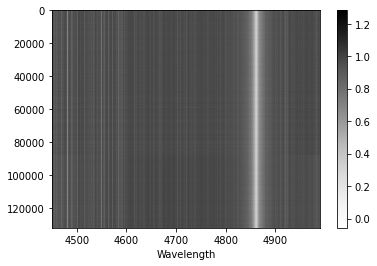

In [5]:
plt.imshow(mat, aspect='auto',cmap='Greys',extent=[lamb.min(),lamb.max(),nmod,0])
plt.title('') 
plt.xlabel('Wavelength')
#plt.ylabel('# of Models')

plt.colorbar()
plt.savefig("Figures/colormap-2.pdf")


## Plotting Random spectra from database

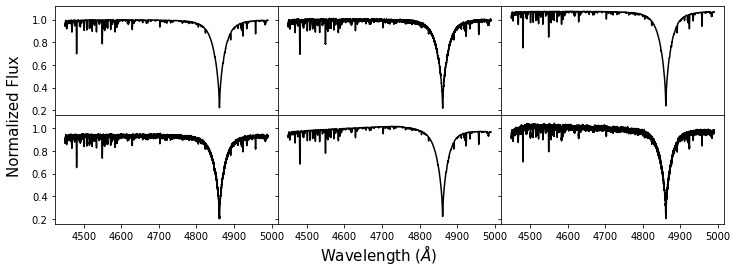

8800.0 K, 4.3 dex, 45.0 Km/s, 0.0 dex


In [24]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 4), sharey=True, sharex=True)
fig.subplots_adjust(hspace=0,wspace=0)


i=2700
ax[0,0].plot(lamb,mat[i,:],'k')
ax[0,1].plot(lamb,mat[i+int(nmod/6),:],'k')
ax[0,2].plot(lamb,mat[i+2*int(nmod/6),:],'k')
ax[1,0].plot(lamb,mat[i+3*int(nmod/6),:],'k')
ax[1,1].plot(lamb,mat[i+4*int(nmod/6),:],'k')
ax[1,2].plot(lamb,mat[i+5*int(nmod/6),:],'k')
fig.text(0.5, 0.0, 'Wavelength ($\AA$)', ha='center',fontsize=15)
fig.text(0.07, 0.5, 'Normalized Flux', va='center', rotation='vertical',fontsize=15)
plt.savefig("Figures/data_aug.png",dpi=300)
plt.savefig("Figures/data_aug.pdf")

plt.show()
print(teff[i],'K,', logg[i],'dex,', vrot[i], 'Km/s,','0.0', 'dex')

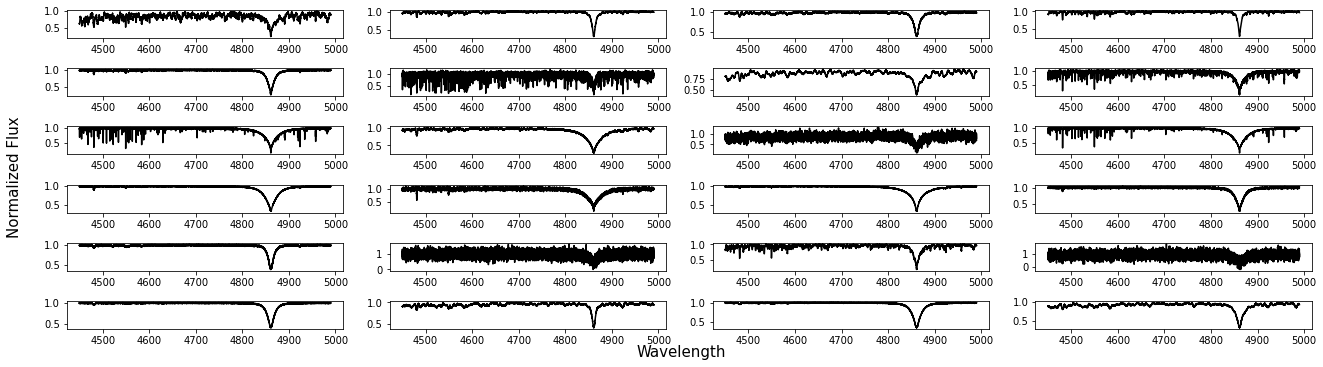

In [5]:
import random 
Obs=Observations2
fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(18, 5))
ax[0,0].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')

ax[0,1].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[0,2].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[0,3].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[1,0].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[1,1].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')

ax[1,2].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')

ax[1,3].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[2,0].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[2,1].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[2,2].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[2,3].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')

ax[3,0].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[3,1].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[3,2].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[3,3].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')

ax[4,0].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[4,1].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[4,2].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[4,3].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')


ax[5,0].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[5,1].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[5,2].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')
ax[5,3].plot(lamb,Obs[random.randrange(0,len(Obs),1)],'k')





fig.text(0.5, 0, 'Wavelength', ha='center',fontsize=15)
fig.text(-0.02, 0.5, 'Normalized Flux', va='center', rotation='vertical',fontsize=15)
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

## Plotting the Observation Matrix

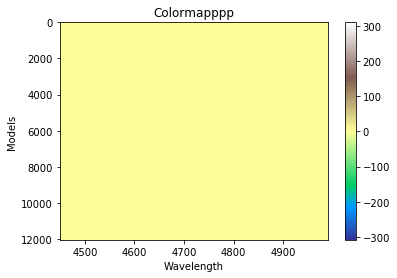

In [68]:
plt.imshow(Obs, aspect='auto',cmap='terrain',extent=[lamb.min(),lamb.max(),len(Obs),0])
plt.title('Colormapppp') 
plt.xlabel('Wavelength')
plt.ylabel('Models')

plt.colorbar()

# PCA

In [4]:
mn=np.mean(mat, axis=0)
C=mat-mn
e, s, aaa=np.linalg.linalg.svd(np.dot(np.transpose(C),C), full_matrices=False)

#play a sound when done
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

0

### Find the best number of coefficient

<ipython-input-5-b6c297b18fdc>:10: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  p=np.zeros((nmod,nk),'Float32')
<ipython-input-5-b6c297b18fdc>:16: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  spec_diff=np.zeros(nwav,'Float32')
<ipython-input-5-b6c297b18fdc>:18: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  spec_rec=np.zeros(nwav,'Float32')


The difference below 1.0% occurs starting nk= 67


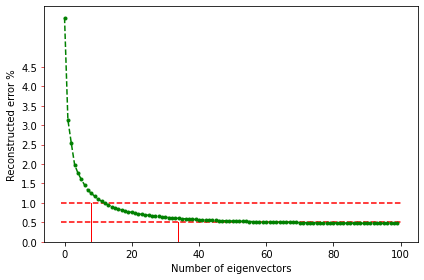

0

In [5]:
a=[]
norm=0
for i in np.arange(len(s)):
    norm=norm+s[i]**2
    a.append(norm)
a=a/norm

nk=100
diff=[]
p=np.zeros((nmod,nk),'Float32')
for k in np.arange(nk):
    for i in np.arange(nmod):
        p[i,k]=np.dot((mat[i,:]-mn),e[:,k])

for j in np.arange(nk):
    spec_diff=np.zeros(nwav,'Float32')
    for i in np.arange(nmod):
        spec_rec=np.zeros(nwav,'Float32')
        ii=0
        for ii in np.arange(j):
            spec_rec=spec_rec+e[:,ii]*p[i,ii]
        
        spec_rec=spec_rec+mn
        spec_diff=spec_diff+(abs((spec_rec-mat[i,:]))/mat[i,:])
    spec_diff=100*spec_diff/nmod
    diff.append(spec_diff.mean())
    
i=0
while(i<nk):
    if diff[i]<0.5:
        break
    i+=1    
print("The difference below 1.0% occurs starting nk=",i)
#nk=50
color = 'tab:red'

fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of eigenvectors')
ax1.set_ylabel('Reconstructed error %')
ax1.plot(np.arange(nk), diff, color='green', marker='.', linestyle='dashed',label='Average reconstructed error')
ax1.tick_params(axis='y', color=color)
ax1.hlines(1.0, -1, nk, colors='r', linestyles='--', label='')
ax1.hlines(0.5, -1, nk, colors='r', linestyles='--', label='')
ax1.bar(8, 1, color='r',width=0.2, bottom=None, align='center')
ax1.bar(34, 0.5, color='r',width=0.2, bottom=None, align='center')
plt.yticks(np.arange(0, 5, 0.5))


#ax1.legend(loc=7)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
#ax2.set_ylabel('Cumulative/norm', color=color)  # we already handled the x-label with ax1
#ax2.plot(np.arange(nk), a[:nk], color=color)
#ax2.tick_params(axis='y', color=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("Figures/PCA-error2.pdf")

plt.show()
#play a sound when done
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))


In [ ]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of eigenvectors')
ax1.set_ylabel('Reconstructed error %')
ax1.plot(np.arange(nk), diff, color='green', marker='.', linestyle='dashed',label='Average reconstructed error')
ax1.tick_params(axis='y', color=color)
ax1.hlines(1.0, -1, nk, colors='r', linestyles='--', label='')
ax1.hlines(0.5, -1, nk, colors='r', linestyles='--', label='')
ax1.bar(8, 1, color='r',width=0.2, bottom=None, align='center')
ax1.bar(34, 0.5, color='r',width=0.2, bottom=None, align='center')
plt.yticks(np.arange(0, 5, 0.5))


## Projecting the Synthetic spectra

In [7]:
# nk the number of eigenvector to consider
nk=50
p=np.zeros((nmod,nk),'Float32')
for k in np.arange(nk):
    for i in np.arange(nmod):
        p[i,k]=np.dot((mat[i,:]-mn),e[:,k])


<ipython-input-7-cf26aa255bbf>:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  p=np.zeros((nmod,nk),'Float32')


## Projecting the Observations

In [10]:
rho=np.zeros((Observations.shape[0],nk),'Float32')

for k in np.arange(nk):
    for i in np.arange(Observations.shape[0]):
        rho[i,k]=np.dot((Observations[i,:]-mn),e[:,k])
    
# projecting the observations with noise
rho2=np.zeros((Observations2.shape[0],nk),'Float32')

for k in np.arange(nk):
    for i in np.arange(Observations2.shape[0]):
        rho2[i,k]=np.dot((Observations2[i,:]-mn),e[:,k])
        
        
       
        
        
        
        

<ipython-input-10-8883f09bd3e5>:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  rho=np.zeros((Observations.shape[0],nk),'Float32')
<ipython-input-10-8883f09bd3e5>:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  rho2=np.zeros((Observations2.shape[0],nk),'Float32')


[]

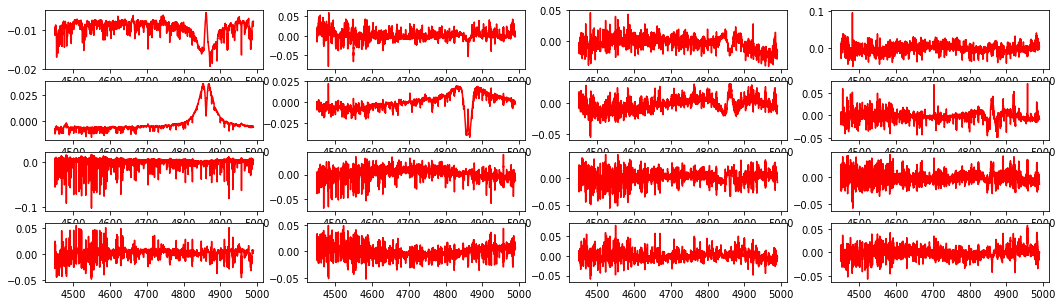

In [9]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 5))

ax[0,0].plot(lamb,e.T[0,:],'r')
ax[1,0].plot(lamb,e.T[1,:],'r')
ax[2,0].plot(lamb,e.T[2,:],'r')
ax[3,0].plot(lamb,e.T[3,:],'r')

ax[0,1].plot(lamb,e.T[4,:],'r')
ax[1,1].plot(lamb,e.T[5,:],'r')
ax[2,1].plot(lamb,e.T[6,:],'r')
ax[3,1].plot(lamb,e.T[7,:],'r')

ax[0,2].plot(lamb,e.T[8,:],'r')
ax[1,2].plot(lamb,e.T[9,:],'r')
ax[2,2].plot(lamb,e.T[10,:],'r')
ax[3,2].plot(lamb,e.T[11,:],'r')

ax[0,3].plot(lamb,e.T[12,:],'r')
ax[1,3].plot(lamb,e.T[13,:],'r')
ax[2,3].plot(lamb,e.T[14,:],'r')
ax[3,3].plot(lamb,e.T[15,:],'r')
plt.plot()
#p.tight_layout()

# Keras Convolutional

## Conv 1D-Teff

In [ ]:
Dump=Dumpfiles[2]


In [11]:
"""


y=np.zeros((nmod, 4))

for i in np.arange(nmod):
    y[i][0]=teff[i]
    y[i][1]=logg[i]
    y[i][2]=vrot[i]
    y[i][3]=meta[i]
#    y[i][4]=SN[i]
 
    
    
out_dim=y.shape[1]   
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
#y=np.array(teff)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

"""
y=np.zeros((len(p)))

for i in np.arange(len(p)):
    y[i]=teff[i]
#    y[i]=logg[i]
#    y[i]=SN[i]
#
#     y[i]=vrot[i]

    
y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
#y=np.array(teff)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]







Targets have the dimension of  (22011, 1)
The features have the dimension of (22011, 50)


In [12]:
X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (17608, 50, 1) (17608, 1)
Test set: (4403, 50, 1) (4403, 1)


### Deleting Some memory

del mat,teff, logg, vrot,Dump, X,y, e, s

In [13]:

#train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
#A=len(list(train_data.as_numpy_iterator())[1][0])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001,
                               patience=6, verbose=1, mode='min') 

#X_test=X_test.reshape(X_test.shape[1],1)


cnn = Sequential()
cnn.add(layers.InputLayer(input_shape=X_train.shape[1:]))
cnn.add(layers.Conv1D(8, kernel_size=4, activation='relu', padding="same"))
cnn.add(Dropout(0.5))
cnn.add(layers.Conv1D(4, kernel_size=4, activation='relu', padding="same"))
cnn.add(Dropout(0.4))
cnn.add(layers.Conv1D(4, kernel_size=4, activation='relu', padding="same"))
cnn.add(Dropout(0.3))
#cnn.add(layers.MaxPooling1D(pool_size=4,strides=1, padding='valid'))
cnn.add(Flatten())
cnn.add(Dense(units = 1024, activation = 'relu',kernel_initializer='he_normal'))
cnn.add(Dense(units = 512, activation = 'relu'))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dense(units = 10, activation = 'relu'))

cnn.add(Dense(units = out_dim, activation = 'linear'))
cnn.compile(loss="mse", optimizer="adam",metrics=["accuracy"])
#history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), batch_size=64,epochs=50,callbacks=[early_stopping])
#mk=cnn.predict(X_train)
#print(mk.shape)

cnn.summary()
#plot_model(model)
#history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=32,callbacks=[early_stopping])
history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=3000, batch_size=64)

#play a sound when done
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 8)             40        
_________________________________________________________________
dropout (Dropout)            (None, 50, 8)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 4)             132       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 4)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 4)             68        
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 4)             0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0

276/276 [==============================] - 2s 8ms/step - loss: 120656.8828 - accuracy: 0.0000e+00 - val_loss: 55711.6094 - val_accuracy: 0.0000e+00
Epoch 90/3000
276/276 [==============================] - 2s 8ms/step - loss: 119785.2109 - accuracy: 0.0000e+00 - val_loss: 50819.3164 - val_accuracy: 0.0000e+00
Epoch 91/3000
276/276 [==============================] - 2s 8ms/step - loss: 118789.8828 - accuracy: 0.0000e+00 - val_loss: 41526.3438 - val_accuracy: 0.0000e+00
Epoch 92/3000
276/276 [==============================] - 2s 8ms/step - loss: 116297.2656 - accuracy: 0.0000e+00 - val_loss: 48350.3594 - val_accuracy: 0.0000e+00
Epoch 93/3000
276/276 [==============================] - 2s 8ms/step - loss: 120609.7656 - accuracy: 0.0000e+00 - val_loss: 92403.8047 - val_accuracy: 0.0000e+00
Epoch 94/3000
276/276 [==============================] - 2s 8ms/step - loss: 115287.2422 - accuracy: 0.0000e+00 - val_loss: 43185.5430 - val_accuracy: 0.0000e+00
Epoch 95/3000
276/276 [===================

Epoch 190/3000
276/276 [==============================] - 2s 8ms/step - loss: 77176.5312 - accuracy: 0.0000e+00 - val_loss: 31745.3418 - val_accuracy: 0.0000e+00
Epoch 191/3000
276/276 [==============================] - 2s 8ms/step - loss: 76288.7266 - accuracy: 0.0000e+00 - val_loss: 33287.9688 - val_accuracy: 0.0000e+00
Epoch 192/3000
276/276 [==============================] - 2s 8ms/step - loss: 73748.7031 - accuracy: 0.0000e+00 - val_loss: 31208.7109 - val_accuracy: 0.0000e+00
Epoch 193/3000
276/276 [==============================] - 2s 8ms/step - loss: 75445.1875 - accuracy: 0.0000e+00 - val_loss: 35028.9844 - val_accuracy: 0.0000e+00
Epoch 194/3000
276/276 [==============================] - 2s 8ms/step - loss: 76364.7734 - accuracy: 0.0000e+00 - val_loss: 34266.3164 - val_accuracy: 0.0000e+00
Epoch 195/3000
276/276 [==============================] - 2s 8ms/step - loss: 76559.7109 - accuracy: 0.0000e+00 - val_loss: 32566.8652 - val_accuracy: 0.0000e+00
Epoch 196/3000
276/276 [====

Epoch 291/3000
276/276 [==============================] - 2s 8ms/step - loss: 61993.5430 - accuracy: 0.0000e+00 - val_loss: 28456.8965 - val_accuracy: 0.0000e+00
Epoch 292/3000
276/276 [==============================] - 2s 8ms/step - loss: 66002.3359 - accuracy: 0.0000e+00 - val_loss: 32262.7695 - val_accuracy: 0.0000e+00
Epoch 293/3000
276/276 [==============================] - 2s 8ms/step - loss: 61625.4727 - accuracy: 0.0000e+00 - val_loss: 30712.8672 - val_accuracy: 0.0000e+00
Epoch 294/3000
276/276 [==============================] - 2s 8ms/step - loss: 63454.9883 - accuracy: 0.0000e+00 - val_loss: 26475.1582 - val_accuracy: 0.0000e+00
Epoch 295/3000
276/276 [==============================] - 2s 8ms/step - loss: 63699.9609 - accuracy: 0.0000e+00 - val_loss: 25658.1270 - val_accuracy: 0.0000e+00
Epoch 296/3000
276/276 [==============================] - 2s 8ms/step - loss: 62290.2461 - accuracy: 0.0000e+00 - val_loss: 28683.3555 - val_accuracy: 0.0000e+00
Epoch 297/3000
276/276 [====

276/276 [==============================] - 2s 9ms/step - loss: 54292.0742 - accuracy: 0.0000e+00 - val_loss: 24903.0742 - val_accuracy: 0.0000e+00
Epoch 392/3000
276/276 [==============================] - 2s 8ms/step - loss: 53856.1680 - accuracy: 0.0000e+00 - val_loss: 33149.5000 - val_accuracy: 0.0000e+00
Epoch 393/3000
276/276 [==============================] - 2s 9ms/step - loss: 54617.0547 - accuracy: 0.0000e+00 - val_loss: 25705.4141 - val_accuracy: 0.0000e+00
Epoch 394/3000
276/276 [==============================] - 3s 10ms/step - loss: 53355.8945 - accuracy: 0.0000e+00 - val_loss: 27259.9492 - val_accuracy: 0.0000e+00
Epoch 395/3000
276/276 [==============================] - 2s 8ms/step - loss: 54924.8555 - accuracy: 0.0000e+00 - val_loss: 24207.5566 - val_accuracy: 0.0000e+00
Epoch 396/3000
276/276 [==============================] - 3s 9ms/step - loss: 54646.0352 - accuracy: 0.0000e+00 - val_loss: 23743.7090 - val_accuracy: 0.0000e+00
Epoch 397/3000
276/276 [==================

Epoch 492/3000
276/276 [==============================] - 2s 8ms/step - loss: 48303.5000 - accuracy: 0.0000e+00 - val_loss: 26041.1172 - val_accuracy: 0.0000e+00
Epoch 493/3000
276/276 [==============================] - 2s 8ms/step - loss: 49799.7227 - accuracy: 0.0000e+00 - val_loss: 24243.5273 - val_accuracy: 0.0000e+00
Epoch 494/3000
276/276 [==============================] - 2s 8ms/step - loss: 49514.7656 - accuracy: 0.0000e+00 - val_loss: 23813.3789 - val_accuracy: 0.0000e+00
Epoch 495/3000
276/276 [==============================] - 2s 8ms/step - loss: 49504.6172 - accuracy: 0.0000e+00 - val_loss: 27619.0234 - val_accuracy: 0.0000e+00
Epoch 496/3000
276/276 [==============================] - 2s 8ms/step - loss: 49882.0391 - accuracy: 0.0000e+00 - val_loss: 24536.4473 - val_accuracy: 0.0000e+00
Epoch 497/3000
276/276 [==============================] - 2s 8ms/step - loss: 47787.7422 - accuracy: 0.0000e+00 - val_loss: 22102.9668 - val_accuracy: 0.0000e+00
Epoch 498/3000
276/276 [====

Epoch 593/3000
276/276 [==============================] - 2s 8ms/step - loss: 46734.6172 - accuracy: 0.0000e+00 - val_loss: 22915.3438 - val_accuracy: 0.0000e+00
Epoch 594/3000
276/276 [==============================] - 2s 8ms/step - loss: 46467.3164 - accuracy: 0.0000e+00 - val_loss: 27229.4258 - val_accuracy: 0.0000e+00
Epoch 595/3000
276/276 [==============================] - 2s 8ms/step - loss: 47365.1836 - accuracy: 0.0000e+00 - val_loss: 23677.0547 - val_accuracy: 0.0000e+00
Epoch 596/3000
276/276 [==============================] - 2s 8ms/step - loss: 45715.1797 - accuracy: 0.0000e+00 - val_loss: 26478.4277 - val_accuracy: 0.0000e+00
Epoch 597/3000
276/276 [==============================] - 2s 8ms/step - loss: 46766.5586 - accuracy: 0.0000e+00 - val_loss: 38016.3125 - val_accuracy: 0.0000e+00
Epoch 598/3000
276/276 [==============================] - 2s 8ms/step - loss: 46570.3281 - accuracy: 0.0000e+00 - val_loss: 23464.3262 - val_accuracy: 0.0000e+00
Epoch 599/3000
276/276 [====

Epoch 694/3000
276/276 [==============================] - 2s 8ms/step - loss: 44232.4883 - accuracy: 0.0000e+00 - val_loss: 21811.0176 - val_accuracy: 0.0000e+00
Epoch 695/3000
276/276 [==============================] - 2s 8ms/step - loss: 46338.6758 - accuracy: 0.0000e+00 - val_loss: 38290.4570 - val_accuracy: 0.0000e+00
Epoch 696/3000
276/276 [==============================] - 2s 8ms/step - loss: 45167.0703 - accuracy: 0.0000e+00 - val_loss: 28176.3398 - val_accuracy: 0.0000e+00
Epoch 697/3000
276/276 [==============================] - 2s 8ms/step - loss: 44579.3008 - accuracy: 0.0000e+00 - val_loss: 22111.5156 - val_accuracy: 0.0000e+00
Epoch 698/3000
276/276 [==============================] - 2s 8ms/step - loss: 44084.2148 - accuracy: 0.0000e+00 - val_loss: 32464.7949 - val_accuracy: 0.0000e+00
Epoch 699/3000
276/276 [==============================] - 2s 8ms/step - loss: 45726.4062 - accuracy: 0.0000e+00 - val_loss: 22843.0762 - val_accuracy: 0.0000e+00
Epoch 700/3000
276/276 [====

276/276 [==============================] - 2s 8ms/step - loss: 42703.6094 - accuracy: 0.0000e+00 - val_loss: 27092.1777 - val_accuracy: 0.0000e+00
Epoch 795/3000
276/276 [==============================] - 2s 8ms/step - loss: 43751.3398 - accuracy: 0.0000e+00 - val_loss: 28154.6172 - val_accuracy: 0.0000e+00
Epoch 796/3000
276/276 [==============================] - 2s 8ms/step - loss: 43844.1797 - accuracy: 0.0000e+00 - val_loss: 22780.5215 - val_accuracy: 0.0000e+00
Epoch 797/3000
276/276 [==============================] - 2s 8ms/step - loss: 44097.6602 - accuracy: 0.0000e+00 - val_loss: 21935.3398 - val_accuracy: 0.0000e+00
Epoch 798/3000
276/276 [==============================] - 2s 8ms/step - loss: 43604.9609 - accuracy: 0.0000e+00 - val_loss: 25267.6016 - val_accuracy: 0.0000e+00
Epoch 799/3000
276/276 [==============================] - 2s 8ms/step - loss: 43693.2539 - accuracy: 0.0000e+00 - val_loss: 26675.8828 - val_accuracy: 0.0000e+00
Epoch 800/3000
276/276 [===================

Epoch 845/3000
276/276 [==============================] - 2s 8ms/step - loss: 41829.7773 - accuracy: 0.0000e+00 - val_loss: 22583.0762 - val_accuracy: 0.0000e+00
Epoch 846/3000
276/276 [==============================] - 2s 8ms/step - loss: 42358.4180 - accuracy: 0.0000e+00 - val_loss: 21522.0703 - val_accuracy: 0.0000e+00
Epoch 847/3000
276/276 [==============================] - 2s 8ms/step - loss: 41646.9219 - accuracy: 0.0000e+00 - val_loss: 24294.8633 - val_accuracy: 0.0000e+00
Epoch 848/3000
276/276 [==============================] - 2s 8ms/step - loss: 41630.0469 - accuracy: 0.0000e+00 - val_loss: 24479.3555 - val_accuracy: 0.0000e+00
Epoch 849/3000
276/276 [==============================] - 2s 8ms/step - loss: 41906.1953 - accuracy: 0.0000e+00 - val_loss: 29272.7617 - val_accuracy: 0.0000e+00
Epoch 850/3000
276/276 [==============================] - 2s 8ms/step - loss: 41500.5312 - accuracy: 0.0000e+00 - val_loss: 24500.5215 - val_accuracy: 0.0000e+00
Epoch 851/3000
276/276 [====

276/276 [==============================] - 2s 8ms/step - loss: 41077.7891 - accuracy: 0.0000e+00 - val_loss: 22347.8965 - val_accuracy: 0.0000e+00
Epoch 946/3000
276/276 [==============================] - 2s 8ms/step - loss: 41091.4570 - accuracy: 0.0000e+00 - val_loss: 23421.0957 - val_accuracy: 0.0000e+00
Epoch 947/3000
276/276 [==============================] - 2s 8ms/step - loss: 42501.5625 - accuracy: 0.0000e+00 - val_loss: 22833.3809 - val_accuracy: 0.0000e+00
Epoch 948/3000
276/276 [==============================] - 2s 8ms/step - loss: 40853.3164 - accuracy: 0.0000e+00 - val_loss: 24824.0996 - val_accuracy: 0.0000e+00
Epoch 949/3000
276/276 [==============================] - 2s 8ms/step - loss: 40103.7500 - accuracy: 0.0000e+00 - val_loss: 22718.7109 - val_accuracy: 0.0000e+00
Epoch 950/3000
276/276 [==============================] - 2s 8ms/step - loss: 41620.3242 - accuracy: 0.0000e+00 - val_loss: 24016.0547 - val_accuracy: 0.0000e+00
Epoch 951/3000
276/276 [===================

Epoch 996/3000
276/276 [==============================] - 2s 8ms/step - loss: 39178.3398 - accuracy: 0.0000e+00 - val_loss: 21270.6035 - val_accuracy: 0.0000e+00
Epoch 997/3000
276/276 [==============================] - 2s 8ms/step - loss: 40169.0977 - accuracy: 0.0000e+00 - val_loss: 22600.5723 - val_accuracy: 0.0000e+00
Epoch 998/3000
276/276 [==============================] - 2s 8ms/step - loss: 40174.0859 - accuracy: 0.0000e+00 - val_loss: 21835.6504 - val_accuracy: 0.0000e+00
Epoch 999/3000
276/276 [==============================] - 2s 8ms/step - loss: 40093.2188 - accuracy: 0.0000e+00 - val_loss: 30917.3125 - val_accuracy: 0.0000e+00
Epoch 1000/3000
276/276 [==============================] - 2s 8ms/step - loss: 40524.2539 - accuracy: 0.0000e+00 - val_loss: 24122.5703 - val_accuracy: 0.0000e+00
Epoch 1001/3000
276/276 [==============================] - 2s 8ms/step - loss: 41049.0312 - accuracy: 0.0000e+00 - val_loss: 23864.8398 - val_accuracy: 0.0000e+00
Epoch 1002/3000
276/276 [=

276/276 [==============================] - 2s 8ms/step - loss: 40649.3516 - accuracy: 0.0000e+00 - val_loss: 23683.9824 - val_accuracy: 0.0000e+00
Epoch 1097/3000
276/276 [==============================] - 2s 8ms/step - loss: 40441.7070 - accuracy: 0.0000e+00 - val_loss: 28480.8828 - val_accuracy: 0.0000e+00
Epoch 1098/3000
276/276 [==============================] - 2s 8ms/step - loss: 40793.0703 - accuracy: 0.0000e+00 - val_loss: 23280.5938 - val_accuracy: 0.0000e+00
Epoch 1099/3000
276/276 [==============================] - 2s 8ms/step - loss: 42496.0703 - accuracy: 0.0000e+00 - val_loss: 29006.5566 - val_accuracy: 0.0000e+00
Epoch 1100/3000
276/276 [==============================] - 2s 8ms/step - loss: 40197.0469 - accuracy: 0.0000e+00 - val_loss: 24210.6562 - val_accuracy: 0.0000e+00
Epoch 1101/3000
276/276 [==============================] - 2s 8ms/step - loss: 41953.2227 - accuracy: 0.0000e+00 - val_loss: 20763.0898 - val_accuracy: 0.0000e+00
Epoch 1102/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 39953.7695 - accuracy: 0.0000e+00 - val_loss: 21836.8320 - val_accuracy: 0.0000e+00
Epoch 1197/3000
276/276 [==============================] - 2s 8ms/step - loss: 39767.9492 - accuracy: 0.0000e+00 - val_loss: 22315.5527 - val_accuracy: 0.0000e+00
Epoch 1198/3000
276/276 [==============================] - 2s 8ms/step - loss: 40436.2422 - accuracy: 0.0000e+00 - val_loss: 22634.5898 - val_accuracy: 0.0000e+00
Epoch 1199/3000
276/276 [==============================] - 2s 8ms/step - loss: 40330.5117 - accuracy: 0.0000e+00 - val_loss: 21577.1016 - val_accuracy: 0.0000e+00
Epoch 1200/3000
276/276 [==============================] - 2s 8ms/step - loss: 38738.3789 - accuracy: 0.0000e+00 - val_loss: 21583.4219 - val_accuracy: 0.0000e+00
Epoch 1201/3000
276/276 [==============================] - 2s 8ms/step - loss: 38436.4688 - accuracy: 0.0000e+00 - val_loss: 22448.8672 - val_accuracy: 0.0000e+00
Epoch 1202/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 39495.2578 - accuracy: 0.0000e+00 - val_loss: 26675.9512 - val_accuracy: 0.0000e+00
Epoch 1297/3000
276/276 [==============================] - 2s 8ms/step - loss: 38973.4023 - accuracy: 0.0000e+00 - val_loss: 21945.7832 - val_accuracy: 0.0000e+00
Epoch 1298/3000
276/276 [==============================] - 2s 8ms/step - loss: 36514.1172 - accuracy: 0.0000e+00 - val_loss: 21594.3203 - val_accuracy: 0.0000e+00
Epoch 1299/3000
276/276 [==============================] - 2s 8ms/step - loss: 37378.5039 - accuracy: 0.0000e+00 - val_loss: 22630.7012 - val_accuracy: 0.0000e+00
Epoch 1300/3000
276/276 [==============================] - 2s 8ms/step - loss: 40000.7656 - accuracy: 0.0000e+00 - val_loss: 20975.5449 - val_accuracy: 0.0000e+00
Epoch 1301/3000
276/276 [==============================] - 2s 8ms/step - loss: 40205.1523 - accuracy: 0.0000e+00 - val_loss: 22444.9805 - val_accuracy: 0.0000e+00
Epoch 1302/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 38038.7891 - accuracy: 0.0000e+00 - val_loss: 20594.8613 - val_accuracy: 0.0000e+00
Epoch 1397/3000
276/276 [==============================] - 2s 8ms/step - loss: 37925.7852 - accuracy: 0.0000e+00 - val_loss: 22338.6914 - val_accuracy: 0.0000e+00
Epoch 1398/3000
276/276 [==============================] - 2s 8ms/step - loss: 38244.1797 - accuracy: 0.0000e+00 - val_loss: 27488.9844 - val_accuracy: 0.0000e+00
Epoch 1399/3000
276/276 [==============================] - 2s 8ms/step - loss: 39279.0703 - accuracy: 0.0000e+00 - val_loss: 27645.0254 - val_accuracy: 0.0000e+00
Epoch 1400/3000
276/276 [==============================] - 2s 8ms/step - loss: 38118.3555 - accuracy: 0.0000e+00 - val_loss: 21005.7266 - val_accuracy: 0.0000e+00
Epoch 1401/3000
276/276 [==============================] - 2s 8ms/step - loss: 38141.0312 - accuracy: 0.0000e+00 - val_loss: 24247.0117 - val_accuracy: 0.0000e+00
Epoch 1402/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 38044.8359 - accuracy: 0.0000e+00 - val_loss: 21220.0391 - val_accuracy: 0.0000e+00
Epoch 1497/3000
276/276 [==============================] - 2s 8ms/step - loss: 37160.1914 - accuracy: 0.0000e+00 - val_loss: 21568.7422 - val_accuracy: 0.0000e+00
Epoch 1498/3000
276/276 [==============================] - 2s 8ms/step - loss: 39035.6094 - accuracy: 0.0000e+00 - val_loss: 21063.2871 - val_accuracy: 0.0000e+00
Epoch 1499/3000
276/276 [==============================] - 2s 8ms/step - loss: 37250.7969 - accuracy: 0.0000e+00 - val_loss: 28228.0977 - val_accuracy: 0.0000e+00
Epoch 1500/3000
276/276 [==============================] - 2s 8ms/step - loss: 36679.2227 - accuracy: 0.0000e+00 - val_loss: 28779.3770 - val_accuracy: 0.0000e+00
Epoch 1501/3000
276/276 [==============================] - 2s 8ms/step - loss: 36414.2773 - accuracy: 0.0000e+00 - val_loss: 20822.2305 - val_accuracy: 0.0000e+00
Epoch 1502/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 37007.2539 - accuracy: 0.0000e+00 - val_loss: 31999.1973 - val_accuracy: 0.0000e+00
Epoch 1597/3000
276/276 [==============================] - 2s 8ms/step - loss: 37990.0391 - accuracy: 0.0000e+00 - val_loss: 22687.8789 - val_accuracy: 0.0000e+00
Epoch 1598/3000
276/276 [==============================] - 2s 8ms/step - loss: 38926.2773 - accuracy: 0.0000e+00 - val_loss: 23157.0215 - val_accuracy: 0.0000e+00
Epoch 1599/3000
276/276 [==============================] - 2s 8ms/step - loss: 37122.3164 - accuracy: 0.0000e+00 - val_loss: 20602.9102 - val_accuracy: 0.0000e+00
Epoch 1600/3000
276/276 [==============================] - 2s 8ms/step - loss: 37496.7031 - accuracy: 0.0000e+00 - val_loss: 20704.1133 - val_accuracy: 0.0000e+00
Epoch 1601/3000
276/276 [==============================] - 2s 8ms/step - loss: 37506.8203 - accuracy: 0.0000e+00 - val_loss: 24043.9844 - val_accuracy: 0.0000e+00
Epoch 1602/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 35357.0117 - accuracy: 0.0000e+00 - val_loss: 23467.5645 - val_accuracy: 0.0000e+00
Epoch 1697/3000
276/276 [==============================] - 2s 8ms/step - loss: 34144.1289 - accuracy: 0.0000e+00 - val_loss: 22640.8203 - val_accuracy: 0.0000e+00
Epoch 1698/3000
276/276 [==============================] - 2s 8ms/step - loss: 35961.3125 - accuracy: 0.0000e+00 - val_loss: 20142.6484 - val_accuracy: 0.0000e+00
Epoch 1699/3000
276/276 [==============================] - 2s 8ms/step - loss: 36642.8672 - accuracy: 0.0000e+00 - val_loss: 30162.5215 - val_accuracy: 0.0000e+00
Epoch 1700/3000
276/276 [==============================] - 2s 8ms/step - loss: 36087.4961 - accuracy: 0.0000e+00 - val_loss: 25823.8105 - val_accuracy: 0.0000e+00
Epoch 1701/3000
276/276 [==============================] - 2s 8ms/step - loss: 36060.5586 - accuracy: 0.0000e+00 - val_loss: 29155.3594 - val_accuracy: 0.0000e+00
Epoch 1702/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 36053.3086 - accuracy: 0.0000e+00 - val_loss: 22046.5625 - val_accuracy: 0.0000e+00
Epoch 1797/3000
276/276 [==============================] - 2s 8ms/step - loss: 34883.1914 - accuracy: 0.0000e+00 - val_loss: 20767.9629 - val_accuracy: 0.0000e+00
Epoch 1798/3000
276/276 [==============================] - 2s 8ms/step - loss: 34463.2500 - accuracy: 0.0000e+00 - val_loss: 21089.1016 - val_accuracy: 0.0000e+00
Epoch 1799/3000
276/276 [==============================] - 2s 8ms/step - loss: 35269.5703 - accuracy: 0.0000e+00 - val_loss: 24615.0273 - val_accuracy: 0.0000e+00
Epoch 1800/3000
276/276 [==============================] - 2s 8ms/step - loss: 35360.3906 - accuracy: 0.0000e+00 - val_loss: 21450.4629 - val_accuracy: 0.0000e+00
Epoch 1801/3000
276/276 [==============================] - 2s 8ms/step - loss: 36088.0156 - accuracy: 0.0000e+00 - val_loss: 23496.2930 - val_accuracy: 0.0000e+00
Epoch 1802/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 34353.1719 - accuracy: 0.0000e+00 - val_loss: 22771.1152 - val_accuracy: 0.0000e+00
Epoch 1897/3000
276/276 [==============================] - 2s 8ms/step - loss: 34851.7148 - accuracy: 0.0000e+00 - val_loss: 22407.5840 - val_accuracy: 0.0000e+00
Epoch 1898/3000
276/276 [==============================] - 2s 8ms/step - loss: 34094.2812 - accuracy: 0.0000e+00 - val_loss: 21113.8945 - val_accuracy: 0.0000e+00
Epoch 1899/3000
276/276 [==============================] - 2s 8ms/step - loss: 35821.7617 - accuracy: 0.0000e+00 - val_loss: 21572.8867 - val_accuracy: 0.0000e+00
Epoch 1900/3000
276/276 [==============================] - 2s 8ms/step - loss: 34553.0977 - accuracy: 0.0000e+00 - val_loss: 24189.5762 - val_accuracy: 0.0000e+00
Epoch 1901/3000
276/276 [==============================] - 2s 8ms/step - loss: 36479.7539 - accuracy: 0.0000e+00 - val_loss: 22037.7617 - val_accuracy: 0.0000e+00
Epoch 1902/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 35185.4297 - accuracy: 0.0000e+00 - val_loss: 23480.6836 - val_accuracy: 0.0000e+00
Epoch 1997/3000
276/276 [==============================] - 2s 8ms/step - loss: 34479.0977 - accuracy: 0.0000e+00 - val_loss: 20142.9922 - val_accuracy: 0.0000e+00
Epoch 1998/3000
276/276 [==============================] - 2s 8ms/step - loss: 35184.4375 - accuracy: 0.0000e+00 - val_loss: 22353.3398 - val_accuracy: 0.0000e+00
Epoch 1999/3000
276/276 [==============================] - 2s 8ms/step - loss: 35297.8047 - accuracy: 0.0000e+00 - val_loss: 21240.6387 - val_accuracy: 0.0000e+00
Epoch 2000/3000
276/276 [==============================] - 2s 8ms/step - loss: 34791.7070 - accuracy: 0.0000e+00 - val_loss: 21855.5957 - val_accuracy: 0.0000e+00
Epoch 2001/3000
276/276 [==============================] - 2s 8ms/step - loss: 35609.8164 - accuracy: 0.0000e+00 - val_loss: 23302.4238 - val_accuracy: 0.0000e+00
Epoch 2002/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 36887.4805 - accuracy: 0.0000e+00 - val_loss: 21878.0605 - val_accuracy: 0.0000e+00
Epoch 2097/3000
276/276 [==============================] - 2s 8ms/step - loss: 36351.4258 - accuracy: 0.0000e+00 - val_loss: 24466.7852 - val_accuracy: 0.0000e+00
Epoch 2098/3000
276/276 [==============================] - 2s 8ms/step - loss: 35021.4141 - accuracy: 0.0000e+00 - val_loss: 21512.0879 - val_accuracy: 0.0000e+00
Epoch 2099/3000
276/276 [==============================] - 2s 8ms/step - loss: 34702.3477 - accuracy: 0.0000e+00 - val_loss: 21877.4746 - val_accuracy: 0.0000e+00
Epoch 2100/3000
276/276 [==============================] - 2s 8ms/step - loss: 35642.9492 - accuracy: 0.0000e+00 - val_loss: 22778.5117 - val_accuracy: 0.0000e+00
Epoch 2101/3000
276/276 [==============================] - 2s 8ms/step - loss: 35451.4844 - accuracy: 0.0000e+00 - val_loss: 20362.5781 - val_accuracy: 0.0000e+00
Epoch 2102/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 34580.8164 - accuracy: 0.0000e+00 - val_loss: 29315.4551 - val_accuracy: 0.0000e+00
Epoch 2197/3000
276/276 [==============================] - 2s 8ms/step - loss: 35036.7188 - accuracy: 0.0000e+00 - val_loss: 21974.6328 - val_accuracy: 0.0000e+00
Epoch 2198/3000
276/276 [==============================] - 2s 8ms/step - loss: 35455.6602 - accuracy: 0.0000e+00 - val_loss: 21767.0820 - val_accuracy: 0.0000e+00
Epoch 2199/3000
276/276 [==============================] - 2s 8ms/step - loss: 34231.2344 - accuracy: 0.0000e+00 - val_loss: 20863.0352 - val_accuracy: 0.0000e+00
Epoch 2200/3000
276/276 [==============================] - 2s 8ms/step - loss: 36112.0781 - accuracy: 0.0000e+00 - val_loss: 22166.5859 - val_accuracy: 0.0000e+00
Epoch 2201/3000
276/276 [==============================] - 2s 8ms/step - loss: 34553.4883 - accuracy: 0.0000e+00 - val_loss: 22706.3340 - val_accuracy: 0.0000e+00
Epoch 2202/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 36818.3398 - accuracy: 0.0000e+00 - val_loss: 23166.5742 - val_accuracy: 0.0000e+00
Epoch 2297/3000
276/276 [==============================] - 2s 8ms/step - loss: 36175.8242 - accuracy: 0.0000e+00 - val_loss: 23572.9668 - val_accuracy: 0.0000e+00
Epoch 2298/3000
276/276 [==============================] - 2s 8ms/step - loss: 35036.7109 - accuracy: 0.0000e+00 - val_loss: 23549.7168 - val_accuracy: 0.0000e+00
Epoch 2299/3000
276/276 [==============================] - 2s 8ms/step - loss: 34255.3320 - accuracy: 0.0000e+00 - val_loss: 25495.0352 - val_accuracy: 0.0000e+00
Epoch 2300/3000
276/276 [==============================] - 2s 8ms/step - loss: 34846.3281 - accuracy: 0.0000e+00 - val_loss: 24722.3984 - val_accuracy: 0.0000e+00
Epoch 2301/3000
276/276 [==============================] - 2s 8ms/step - loss: 34403.5938 - accuracy: 0.0000e+00 - val_loss: 22117.7754 - val_accuracy: 0.0000e+00
Epoch 2302/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 34820.7891 - accuracy: 0.0000e+00 - val_loss: 23006.5098 - val_accuracy: 0.0000e+00
Epoch 2397/3000
276/276 [==============================] - 2s 8ms/step - loss: 35435.8203 - accuracy: 0.0000e+00 - val_loss: 21486.8145 - val_accuracy: 0.0000e+00
Epoch 2398/3000
276/276 [==============================] - 2s 8ms/step - loss: 32086.8398 - accuracy: 0.0000e+00 - val_loss: 22052.4961 - val_accuracy: 0.0000e+00
Epoch 2399/3000
276/276 [==============================] - 2s 8ms/step - loss: 33623.5039 - accuracy: 0.0000e+00 - val_loss: 20149.5449 - val_accuracy: 0.0000e+00
Epoch 2400/3000
276/276 [==============================] - 2s 8ms/step - loss: 34464.3594 - accuracy: 0.0000e+00 - val_loss: 27629.5762 - val_accuracy: 0.0000e+00
Epoch 2401/3000
276/276 [==============================] - 2s 8ms/step - loss: 33946.2812 - accuracy: 0.0000e+00 - val_loss: 20251.6914 - val_accuracy: 0.0000e+00
Epoch 2402/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 34406.1055 - accuracy: 0.0000e+00 - val_loss: 21580.1992 - val_accuracy: 0.0000e+00
Epoch 2497/3000
276/276 [==============================] - 2s 8ms/step - loss: 34034.4727 - accuracy: 0.0000e+00 - val_loss: 21037.1367 - val_accuracy: 0.0000e+00
Epoch 2498/3000
276/276 [==============================] - 2s 8ms/step - loss: 33701.3008 - accuracy: 0.0000e+00 - val_loss: 23772.6680 - val_accuracy: 0.0000e+00
Epoch 2499/3000
276/276 [==============================] - 2s 8ms/step - loss: 36725.7617 - accuracy: 0.0000e+00 - val_loss: 21285.2559 - val_accuracy: 0.0000e+00
Epoch 2500/3000
276/276 [==============================] - 2s 8ms/step - loss: 36542.7812 - accuracy: 0.0000e+00 - val_loss: 22524.6074 - val_accuracy: 0.0000e+00
Epoch 2501/3000
276/276 [==============================] - 2s 8ms/step - loss: 33941.8984 - accuracy: 0.0000e+00 - val_loss: 21256.8145 - val_accuracy: 0.0000e+00
Epoch 2502/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 33920.4258 - accuracy: 0.0000e+00 - val_loss: 23170.8066 - val_accuracy: 0.0000e+00
Epoch 2597/3000
276/276 [==============================] - 2s 8ms/step - loss: 33105.6719 - accuracy: 0.0000e+00 - val_loss: 21425.2285 - val_accuracy: 0.0000e+00
Epoch 2598/3000
276/276 [==============================] - 2s 8ms/step - loss: 35305.8945 - accuracy: 0.0000e+00 - val_loss: 21782.4082 - val_accuracy: 0.0000e+00
Epoch 2599/3000
276/276 [==============================] - 2s 8ms/step - loss: 33384.5820 - accuracy: 0.0000e+00 - val_loss: 20493.1152 - val_accuracy: 0.0000e+00
Epoch 2600/3000
276/276 [==============================] - 2s 8ms/step - loss: 34223.8242 - accuracy: 0.0000e+00 - val_loss: 21361.4180 - val_accuracy: 0.0000e+00
Epoch 2601/3000
276/276 [==============================] - 2s 8ms/step - loss: 34766.5039 - accuracy: 0.0000e+00 - val_loss: 20605.9551 - val_accuracy: 0.0000e+00
Epoch 2602/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 33298.8086 - accuracy: 0.0000e+00 - val_loss: 21385.5605 - val_accuracy: 0.0000e+00
Epoch 2697/3000
276/276 [==============================] - 2s 8ms/step - loss: 31347.9336 - accuracy: 0.0000e+00 - val_loss: 20490.2715 - val_accuracy: 0.0000e+00
Epoch 2698/3000
276/276 [==============================] - 2s 8ms/step - loss: 33369.8047 - accuracy: 0.0000e+00 - val_loss: 21645.4492 - val_accuracy: 0.0000e+00
Epoch 2699/3000
276/276 [==============================] - 2s 8ms/step - loss: 34377.7227 - accuracy: 0.0000e+00 - val_loss: 21612.0254 - val_accuracy: 0.0000e+00
Epoch 2700/3000
276/276 [==============================] - 2s 8ms/step - loss: 33288.8750 - accuracy: 0.0000e+00 - val_loss: 23959.6562 - val_accuracy: 0.0000e+00
Epoch 2701/3000
276/276 [==============================] - 2s 8ms/step - loss: 32375.2988 - accuracy: 0.0000e+00 - val_loss: 22179.6035 - val_accuracy: 0.0000e+00
Epoch 2702/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 35340.7695 - accuracy: 0.0000e+00 - val_loss: 20825.5371 - val_accuracy: 0.0000e+00
Epoch 2797/3000
276/276 [==============================] - 2s 8ms/step - loss: 33924.0664 - accuracy: 0.0000e+00 - val_loss: 21932.4316 - val_accuracy: 0.0000e+00
Epoch 2798/3000
276/276 [==============================] - 2s 8ms/step - loss: 32623.0723 - accuracy: 0.0000e+00 - val_loss: 24429.6504 - val_accuracy: 0.0000e+00
Epoch 2799/3000
276/276 [==============================] - 2s 8ms/step - loss: 33287.1250 - accuracy: 0.0000e+00 - val_loss: 23834.4824 - val_accuracy: 0.0000e+00
Epoch 2800/3000
276/276 [==============================] - 2s 8ms/step - loss: 33289.9297 - accuracy: 0.0000e+00 - val_loss: 22945.7988 - val_accuracy: 0.0000e+00
Epoch 2801/3000
276/276 [==============================] - 2s 8ms/step - loss: 32430.1973 - accuracy: 0.0000e+00 - val_loss: 20349.5645 - val_accuracy: 0.0000e+00
Epoch 2802/3000
276/276 [=============

276/276 [==============================] - 2s 9ms/step - loss: 32963.2383 - accuracy: 0.0000e+00 - val_loss: 21280.8027 - val_accuracy: 0.0000e+00
Epoch 2897/3000
276/276 [==============================] - 3s 9ms/step - loss: 32808.5469 - accuracy: 0.0000e+00 - val_loss: 20869.3574 - val_accuracy: 0.0000e+00
Epoch 2898/3000
276/276 [==============================] - 2s 9ms/step - loss: 33604.2734 - accuracy: 0.0000e+00 - val_loss: 20788.0254 - val_accuracy: 0.0000e+00
Epoch 2899/3000
276/276 [==============================] - 2s 9ms/step - loss: 33279.5977 - accuracy: 0.0000e+00 - val_loss: 21459.0352 - val_accuracy: 0.0000e+00
Epoch 2900/3000
276/276 [==============================] - 2s 9ms/step - loss: 32580.4590 - accuracy: 0.0000e+00 - val_loss: 21730.7539 - val_accuracy: 0.0000e+00
Epoch 2901/3000
276/276 [==============================] - 2s 9ms/step - loss: 32434.3477 - accuracy: 0.0000e+00 - val_loss: 23459.3867 - val_accuracy: 0.0000e+00
Epoch 2902/3000
276/276 [=============

276/276 [==============================] - 2s 8ms/step - loss: 32184.7344 - accuracy: 0.0000e+00 - val_loss: 21170.6191 - val_accuracy: 0.0000e+00
Epoch 2997/3000
276/276 [==============================] - 2s 8ms/step - loss: 32501.7578 - accuracy: 0.0000e+00 - val_loss: 21060.8438 - val_accuracy: 0.0000e+00
Epoch 2998/3000
276/276 [==============================] - 2s 8ms/step - loss: 33015.5586 - accuracy: 0.0000e+00 - val_loss: 20876.8672 - val_accuracy: 0.0000e+00
Epoch 2999/3000
276/276 [==============================] - 2s 8ms/step - loss: 33299.0234 - accuracy: 0.0000e+00 - val_loss: 20807.3418 - val_accuracy: 0.0000e+00
Epoch 3000/3000
276/276 [==============================] - 2s 8ms/step - loss: 33778.7227 - accuracy: 0.0000e+00 - val_loss: 20767.2246 - val_accuracy: 0.0000e+00


0

### Evaluation of the model

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

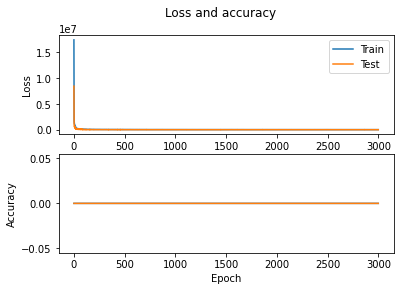

In [14]:
fig, ax = plt.subplots(2)
fig.suptitle('Loss and accuracy')


ax[0].plot(history.history['loss']) 
ax[0].plot(history.history['val_loss']) 
ax[0].set(xlabel='Epoch', ylabel='Loss') 
ax[0].legend(['Train', 'Test'], loc='upper right') 


ax[1].plot(history.history['accuracy'], label='accuracy')
ax[1].plot(history.history['val_accuracy'], label = 'val_accuracy')
ax[1].set(xlabel='Epoch', ylabel='Accuracy') 




[]

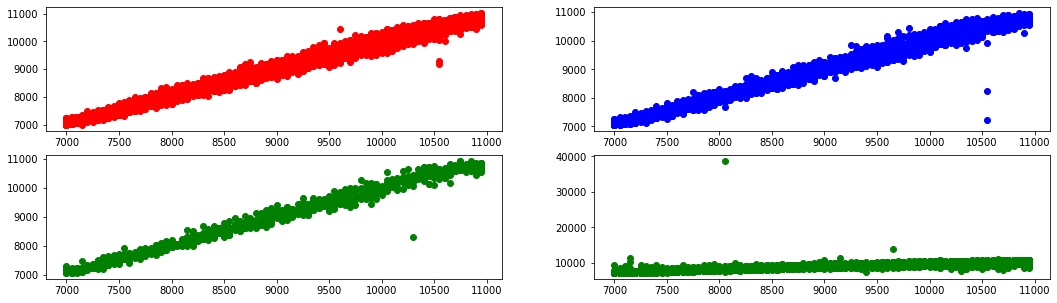

In [15]:
# PLots in case we have one label only

Xobs=rho
Xobs = preprocessing.StandardScaler().fit(Xobs).transform(Xobs.astype(float))
Xobs = Xobs.reshape(list(Xobs.shape) + [1])
yobs=cnn.predict(Xobs)

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)




#vsini2=[]
#for i in np.arange(len(lst2)):
#    vsini2.append(float(lst2[i][47:50]))
#grav2=[]
#for i in np.arange(len(lst2)):
#    grav2.append(float(lst2[i][38:42]))
#temp2=[]
#for i in np.arange(len(lst2)):
#    temp2.append(float(lst2[i][31:37]))
#sn2=[]
#for i in np.arange(len(lst2)):
#    sn2.append(float(lst2[i][86:-4]))

vsini=[]
for i in np.arange(len(lst)):
    vsini.append(float(lst[i][51:54]))
grav=[]
for i in np.arange(len(lst)):
    grav.append(float(lst[i][42:46]))
temp=[]
for i in np.arange(len(lst)):
    temp.append(float(lst[i][35:41]))
meta=[]
for i in np.arange(len(lst)):
    meta.append(float(lst[i][67:73]))


vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))
temp2=[]
for i in np.arange(len(lst2)):
    temp2.append(float(lst2[i][35:41]))
meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))
    
    
    
    
y_hat = cnn.predict(X_train)
y_pred = cnn.predict(X_test)



fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))

ax[0,0].plot(y_train,y_hat,'ro', label='Train')
ax[0,1].plot(y_test,y_pred,'bo', label='Test')
ax[1,0].plot(temp,yobs,'go', label='Obs')
ax[1,1].plot(temp2,yobs2,'go', label='Obs')
plt.plot()



In [16]:

def get_model_summary(model):
    stream = io.StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary_string = stream.getvalue()
    stream.close()
    return summary_string

model_summary_string = get_model_summary(cnn)


eval_train=(1/len(y_train))*((abs(y_hat-y_train)**2).sum())
eval_test=(1/len(y_test))*((abs(y_pred-y_test)**2).sum())
eval_obs=(1/len(temp))*((abs(yobs[:,0]-temp)**2).sum())
eval_obs2=(1/len(temp2))*((abs(yobs2[:,0]-temp2)**2).sum())

print("evaluation Training", eval_train**0.5)
print("evaluation Validation", eval_test**0.5)
print("evaluation Observation", eval_obs**0.5)
print("evaluation Observation2", eval_obs2**0.5)


o=open("Evaluation_CNN","a")
o.write("\n"+str(model_summary_string)+"\n")
o.write("Evaluation Training"  +"\t"+str(eval_train**0.5)+"\n" \
        +"Evaluation Validation"  +"\t"+str(eval_test**0.5)+"\n" \
        +"Evaluation Observation"  +"\t"+str(eval_obs**0.5)+"\n" \
       +"Evaluation Observation2"  +"\t"+str(eval_obs2**0.5)+"\n") 
o.close()

evaluation Training 104.06757069761773
evaluation Validation 144.10837339193523
evaluation Observation 144.9157532300318
evaluation Observation2 473.4910848329516


## Evaluation depending on Signal to Noise

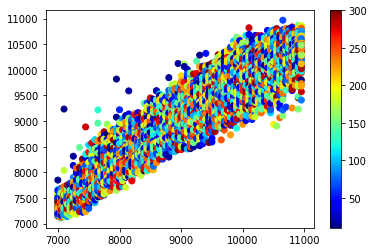

[350.62064]


In [17]:


Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)
vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))

meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))
temp2=np.array(temp2)
yobs2=np.array(yobs2)
sn2=np.array(sn2)
vsini2=np.array(vsini2)
grav2=np.array(grav2)
#_______________________
mask=(sn2>10)&(vsini2<301)&(temp2>=7000)&(grav2>=2.0)
#-------------------------

vin=temp2[mask]
ys=yobs2[mask]
c2=sn2[mask]
plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet))

eval_obs2=0
for i in np.arange(len(vin)):
    eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
eval_obs2=eval_obs2/len(vin)
eval_obs2=eval_obs2**0.5

plt.show()
print(eval_obs2)



# Save the Model

In [ ]:
# save model and architecture to single file
model_name="cnnTeff"+Dump+".h5"
#cnn.save("cnnTeff.h5")
cnn.save(model_name)
print("Saved model to disk") 


# Load the Model


In [ ]:
cnn = load_model('cnnTeff-Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-200-logg2.00-5.00-0.20-vsini0-300-meta-1.50-1.50-0.20-Vmicr2.00-2.00-1.00-Resolution60000.h5')

# Conv1D-logg


In [ ]:
Dump=Dumpfiles[2]


In [18]:

y=np.zeros((len(p)))

for i in np.arange(len(p)):
#    y[i]=teff[i]
    y[i]=logg[i]
#    y[i]=SN[i]
#
#     y[i]=vrot[i]

    
y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
#y=np.array(teff)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Targets have the dimension of  (22011, 1)
The features have the dimension of (22011, 50)
Train set: (17608, 50, 1) (17608, 1)
Test set: (4403, 50, 1) (4403, 1)


In [19]:

#train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
#A=len(list(train_data.as_numpy_iterator())[1][0])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001,
                               patience=6, verbose=1, mode='min') 

#X_test=X_test.reshape(X_test.shape[1],1)


cnn = Sequential()
cnn.add(layers.InputLayer(input_shape=X_train.shape[1:]))
cnn.add(layers.Conv1D(8, kernel_size=4, activation='relu', padding="same"))
cnn.add(Dropout(0.5))
cnn.add(layers.Conv1D(4, kernel_size=4, activation='relu', padding="same"))
cnn.add(Dropout(0.4))
cnn.add(layers.Conv1D(4, kernel_size=4, activation='relu', padding="same"))
cnn.add(Dropout(0.3))
rho2
#cnn.add(layers.MaxPooling1D(pool_size=4,strides=1, padding='valid'))
cnn.add(Flatten())
cnn.add(Dense(units = 1024, activation = 'relu',kernel_initializer='he_normal'))
cnn.add(Dense(units = 512, activation = 'relu'))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dense(units = 10, activation = 'relu'))

cnn.add(Dense(units = out_dim, activation = 'linear'))
cnn.compile(loss="mse", optimizer="adam",metrics=["accuracy"])
#history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), batch_size=64,epochs=50,callbacks=[early_stopping])
#mk=cnn.predict(X_train)
#print(mk.shape)

cnn.summary()
#plot_model(model)
#history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=32,callbacks=[early_stopping])
history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

#play a sound when done
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 50, 8)             40        
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 8)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 50, 4)             132       
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 4)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 50, 4)             68        
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 4)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)              

Epoch 96/100
276/276 [==============================] - 2s 8ms/step - loss: 0.0351 - accuracy: 0.0000e+00 - val_loss: 0.0166 - val_accuracy: 0.0000e+00
Epoch 97/100
276/276 [==============================] - 2s 8ms/step - loss: 0.0361 - accuracy: 0.0000e+00 - val_loss: 0.0155 - val_accuracy: 0.0000e+00
Epoch 98/100
276/276 [==============================] - 2s 8ms/step - loss: 0.0354 - accuracy: 0.0000e+00 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 99/100
276/276 [==============================] - 2s 8ms/step - loss: 0.0349 - accuracy: 0.0000e+00 - val_loss: 0.0145 - val_accuracy: 0.0000e+00
Epoch 100/100
276/276 [==============================] - 2s 8ms/step - loss: 0.0358 - accuracy: 0.0000e+00 - val_loss: 0.0175 - val_accuracy: 0.0000e+00


0

[]

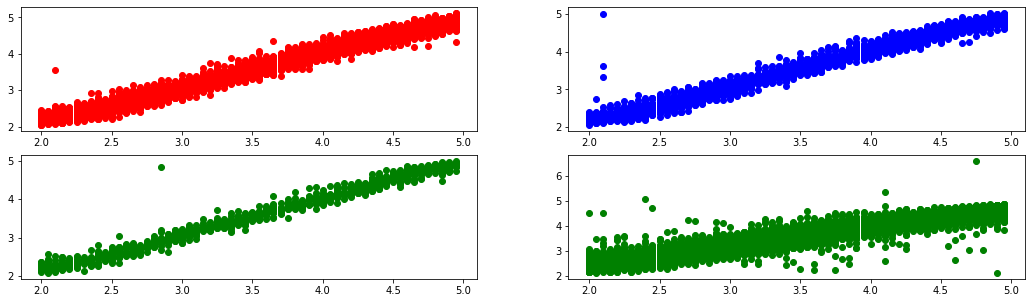

In [20]:
# PLots in case we have one label only

Xobs=rho
Xobs = preprocessing.StandardScaler().fit(Xobs).transform(Xobs.astype(float))
Xobs = Xobs.reshape(list(Xobs.shape) + [1])
yobs=cnn.predict(Xobs)

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)


vsini=[]
for i in np.arange(len(lst)):
    vsini.append(float(lst[i][51:54]))
grav=[]
for i in np.arange(len(lst)):
    grav.append(float(lst[i][42:46]))
temp=[]
for i in np.arange(len(lst)):
    temp.append(float(lst[i][35:41]))
meta=[]
for i in np.arange(len(lst)):
    meta.append(float(lst[i][67:73]))


vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))
temp2=[]
for i in np.arange(len(lst2)):
    temp2.append(float(lst2[i][35:41]))
meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))

y_hat = cnn.predict(X_train)
y_pred = cnn.predict(X_test)



fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))

ax[0,0].plot(y_train,y_hat,'ro', label='Train')
ax[0,1].plot(y_test,y_pred,'bo', label='Test')
ax[1,0].plot(grav,yobs,'go', label='Obs')
ax[1,1].plot(grav2,yobs2,'go', label='Obs')
plt.plot()



In [21]:

def get_model_summary(model):
    stream = io.StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary_string = stream.getvalue()
    stream.close()
    return summary_string

model_summary_string = get_model_summary(cnn)


eval_train=(1/len(y_train))*((abs(y_hat-y_train)**2).sum())
eval_test=(1/len(y_test))*((abs(y_pred-y_test)**2).sum())
eval_obs=(1/len(grav))*((abs(yobs[:,0]-grav)**2).sum())
eval_obs2=(1/len(grav2))*((abs(yobs2[:,0]-grav2)**2).sum())

print("evaluation Training", eval_train**0.5)
print("evaluation Validation", eval_test**0.5)
print("evaluation Observation", eval_obs**0.5)
print("evaluation Observation2", eval_obs2**0.5)


o=open("Evaluation_CNN","a")
o.write("\n"+str(model_summary_string)+"\n")
o.write("Evaluation Training"  +"\t"+str(eval_train**0.5)+"\n" \
        +"Evaluation Validation"  +"\t"+str(eval_test**0.5)+"\n" \
        +"Evaluation Observation"  +"\t"+str(eval_obs**0.5)+"\n" \
       +"Evaluation Observation2"  +"\t"+str(eval_obs2**0.5)+"\n") 
o.close()

evaluation Training 0.11236018889500553
evaluation Validation 0.13231407288165536
evaluation Observation 0.14022116297634488
evaluation Observation2 0.2903978105848785


## Evaluation as a function of S/N

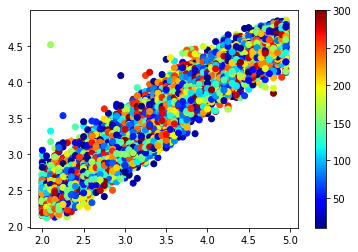

[0.2717599]


In [22]:

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)
vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))

meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))
temp2=np.array(temp2)
yobs2=np.array(yobs2)
sn2=np.array(sn2)
vsini2=np.array(vsini2)
grav2=np.array(grav2)
#_______________________
mask=(sn2>10)&(vsini2<301)&(temp2>=7000)&(grav2>=2.0)
#-------------------------

vin=grav2[mask]
ys=yobs2[mask]
c2=sn2[mask]
plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet))

eval_obs2=0
for i in np.arange(len(vin)):
    eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
eval_obs2=eval_obs2/len(vin)
eval_obs2=eval_obs2**0.5

plt.show()
print(eval_obs2)

# Conv1D-vsini


In [ ]:
Dump=Dumpfiles[2]
#Dump=Dumpfiles[0]


In [23]:

y=np.zeros((len(p)))

for i in np.arange(len(p)):
#    y[i]=teff[i]
#    y[i]=logg[i]
#    y[i]=SN[i]
#
     y[i]=vrot[i]

    
y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
#y=np.array(teff)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Targets have the dimension of  (22011, 1)
The features have the dimension of (22011, 50)
Train set: (17608, 50, 1) (17608, 1)
Test set: (4403, 50, 1) (4403, 1)


In [24]:

#train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
#A=len(list(train_data.as_numpy_iterator())[1][0])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001,
                               patience=6, verbose=1, mode='min') 

#X_test=X_test.reshape(X_test.shape[1],1)


cnn = Sequential()
cnn.add(layers.InputLayer(input_shape=X_train.shape[1:]))
cnn.add(layers.Conv1D(8, kernel_size=4, activation='relu', padding="same"))
cnn.add(Dropout(0.5))
cnn.add(layers.Conv1D(4, kernel_size=4, activation='relu', padding="same"))
cnn.add(Dropout(0.4))
cnn.add(layers.Conv1D(4, kernel_size=4, activation='relu', padding="same"))
cnn.add(Dropout(0.3))
rho2
#cnn.add(layers.MaxPooling1D(pool_size=4,strides=1, padding='valid'))
cnn.add(Flatten())
cnn.add(Dense(units = 1024, activation = 'relu',kernel_initializer='he_normal'))
cnn.add(Dense(units = 512, activation = 'relu'))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dense(units = 10, activation = 'relu'))

cnn.add(Dense(units = out_dim, activation = 'linear'))
cnn.compile(loss="mse", optimizer="adam",metrics=["accuracy"])
#history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), batch_size=64,epochs=50,callbacks=[early_stopping])
#mk=cnn.predict(X_train)
#print(mk.shape)

cnn.summary()
#plot_model(model)
#history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=32,callbacks=[early_stopping])
history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=150, batch_size=64)

#play a sound when done
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 50, 8)             40        
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 8)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 50, 4)             132       
_________________________________________________________________
dropout_7 (Dropout)          (None, 50, 4)             0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 50, 4)             68        
_________________________________________________________________
dropout_8 (Dropout)          (None, 50, 4)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 200)              

276/276 [==============================] - 2s 8ms/step - loss: 58.2635 - accuracy: 0.0060 - val_loss: 24.8632 - val_accuracy: 0.0055
Epoch 100/150
276/276 [==============================] - 2s 8ms/step - loss: 56.7659 - accuracy: 0.0060 - val_loss: 33.1834 - val_accuracy: 0.0055
Epoch 101/150
276/276 [==============================] - 2s 8ms/step - loss: 67.0435 - accuracy: 0.0060 - val_loss: 22.4577 - val_accuracy: 0.0055
Epoch 102/150
276/276 [==============================] - 2s 8ms/step - loss: 63.5155 - accuracy: 0.0060 - val_loss: 29.3140 - val_accuracy: 0.0055
Epoch 103/150
276/276 [==============================] - 2s 8ms/step - loss: 71.4798 - accuracy: 0.0060 - val_loss: 24.4879 - val_accuracy: 0.0055
Epoch 104/150
276/276 [==============================] - 2s 8ms/step - loss: 55.4252 - accuracy: 0.0060 - val_loss: 26.4805 - val_accuracy: 0.0055
Epoch 105/150
276/276 [==============================] - 2s 8ms/step - loss: 58.8492 - accuracy: 0.0060 - val_loss: 22.4963 - val_ac

0

[]

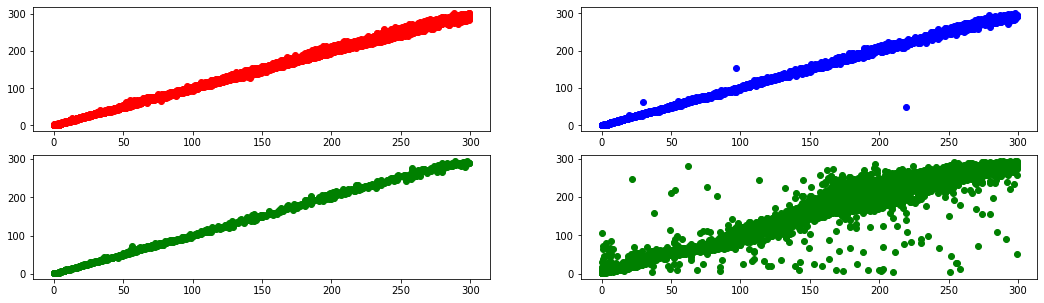

In [25]:
# PLots in case we have one label only

Xobs=rho
Xobs = preprocessing.StandardScaler().fit(Xobs).transform(Xobs.astype(float))
Xobs = Xobs.reshape(list(Xobs.shape) + [1])
yobs=cnn.predict(Xobs)

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)


vsini=[]
for i in np.arange(len(lst)):
    vsini.append(float(lst[i][51:54]))
grav=[]
for i in np.arange(len(lst)):
    grav.append(float(lst[i][42:46]))
temp=[]
for i in np.arange(len(lst)):
    temp.append(float(lst[i][35:41]))
meta=[]
for i in np.arange(len(lst)):
    meta.append(float(lst[i][67:73]))

vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))
temp2=[]
for i in np.arange(len(lst2)):
    temp2.append(float(lst2[i][35:41]))
meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))

y_hat = cnn.predict(X_train)
y_pred = cnn.predict(X_test)



fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))

ax[0,0].plot(y_train,y_hat,'ro', label='Train')
ax[0,1].plot(y_test,y_pred,'bo', label='Test')
ax[1,0].plot(vsini,yobs,'go', label='Obs')
ax[1,1].plot(vsini2,yobs2,'go', label='Obs')
plt.plot()



In [26]:

def get_model_summary(model):
    stream = io.StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary_string = stream.getvalue()
    stream.close()
    return summary_string

model_summary_string = get_model_summary(cnn)


eval_train=(1/len(y_train))*((abs(y_hat-y_train)**2).sum())
eval_test=(1/len(y_test))*((abs(y_pred-y_test)**2).sum())
eval_obs=(1/len(vsini))*((abs(yobs[:,0]-vsini)**2).sum())
eval_obs2=(1/len(vsini2))*((abs(yobs2[:,0]-vsini2)**2).sum())

print("evaluation Training", eval_train**0.5)
print("evaluation Validation", eval_test**0.5)
print("evaluation Observation", eval_obs**0.5)
print("evaluation Observation2", eval_obs2**0.5)


o=open("Evaluation_CNN","a")
o.write("\n"+str(model_summary_string)+"\n")
o.write("Evaluation Training"  +"\t"+str(eval_train**0.5)+"\n" \
        +"Evaluation Validation"  +"\t"+str(eval_test**0.5)+"\n" \
        +"Evaluation Observation"  +"\t"+str(eval_obs**0.5)+"\n" \
       +"Evaluation Observation2"  +"\t"+str(eval_obs2**0.5)+"\n") 
o.close()

evaluation Training 3.372039566991415
evaluation Validation 4.475217737662844
evaluation Observation 3.8243693267926115
evaluation Observation2 18.314031043294978


## Evaluation as a function of S/N

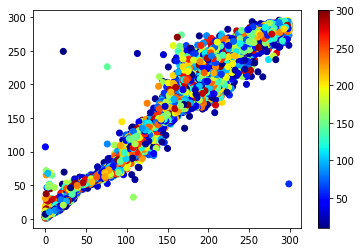

[14.773617]


In [29]:


Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)
vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))

meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))
temp2=np.array(temp2)
yobs2=np.array(yobs2)
sn2=np.array(sn2)
vsini2=np.array(vsini2)
grav2=np.array(grav2)
#_______________________
mask=(sn2>10)&(vsini2<301)&(temp2>=7000)&(grav2>=2.0)
#-------------------------

vin=vsini2[mask]
ys=yobs2[mask]
c2=sn2[mask]
plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet))

eval_obs2=0
for i in np.arange(len(vin)):
    eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
eval_obs2=eval_obs2/len(vin)
eval_obs2=eval_obs2**0.5

plt.show()
print(eval_obs2)



# Conv1D-[Fe/H]


In [36]:

y=np.zeros((len(p)))

for i in np.arange(len(p)):
#    y[i]=teff[i]
#    y[i]=logg[i]
#    y[i]=SN[i]
     y[i]=metal[i]

    
y=y.reshape((y.shape[0],1))
out_dim=y.shape[1]
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
#y=np.array(teff)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Targets have the dimension of  (22011, 1)
The features have the dimension of (22011, 50)
Train set: (17608, 50, 1) (17608, 1)
Test set: (4403, 50, 1) (4403, 1)


In [41]:

#train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
#A=len(list(train_data.as_numpy_iterator())[1][0])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001,
                               patience=6, verbose=1, mode='min') 

#X_test=X_test.reshape(X_test.shape[1],1)


cnn = Sequential()
cnn.add(layers.InputLayer(input_shape=X_train.shape[1:]))
cnn.add(layers.Conv1D(8, kernel_size=4, activation='relu', padding="same"))
#cnn.add(Dropout(0.5))
cnn.add(layers.Conv1D(4, kernel_size=4, activation='relu', padding="same"))
#cnn.add(Dropout(0.4))
cnn.add(layers.Conv1D(4, kernel_size=4, activation='relu', padding="same"))
#cnn.add(Dropout(0.3))
rho2
#cnn.add(layers.MaxPooling1D(pool_size=4,strides=1, padding='valid'))
cnn.add(Flatten())
cnn.add(Dense(units = 1024, activation = 'relu',kernel_initializer='he_normal'))
cnn.add(Dense(units = 512, activation = 'relu'))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dense(units = 10, activation = 'relu'))

cnn.add(Dense(units = out_dim, activation = 'linear'))
cnn.compile(loss="mse", optimizer="adam",metrics=["accuracy"])
#history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), batch_size=64,epochs=50,callbacks=[early_stopping])
#mk=cnn.predict(X_train)
#print(mk.shape)

cnn.summary()
#plot_model(model)
#history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=32,callbacks=[early_stopping])
history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=150, batch_size=64)

#play a sound when done
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 50, 8)             40        
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 50, 4)             132       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 50, 4)             68        
_________________________________________________________________
flatten_5 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1024)              205824    
_________________________________________________________________
dense_26 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_27 (Dense)             (None, 64)               

276/276 [==============================] - 3s 9ms/step - loss: 4.4471e-04 - accuracy: 5.6792e-04 - val_loss: 5.6894e-04 - val_accuracy: 6.8135e-04
Epoch 96/150
276/276 [==============================] - 2s 8ms/step - loss: 5.4672e-04 - accuracy: 5.6792e-04 - val_loss: 4.9143e-04 - val_accuracy: 6.8135e-04
Epoch 97/150
276/276 [==============================] - 2s 8ms/step - loss: 4.4922e-04 - accuracy: 5.6792e-04 - val_loss: 0.0019 - val_accuracy: 6.8135e-04
Epoch 98/150
276/276 [==============================] - 2s 8ms/step - loss: 5.7187e-04 - accuracy: 5.6792e-04 - val_loss: 6.5030e-04 - val_accuracy: 6.8135e-04
Epoch 99/150
276/276 [==============================] - 2s 8ms/step - loss: 4.6454e-04 - accuracy: 5.6792e-04 - val_loss: 6.2648e-04 - val_accuracy: 6.8135e-04
Epoch 100/150
276/276 [==============================] - 2s 8ms/step - loss: 5.4612e-04 - accuracy: 5.6792e-04 - val_loss: 4.7769e-04 - val_accuracy: 6.8135e-04
Epoch 101/150
276/276 [==============================] -

0

[]

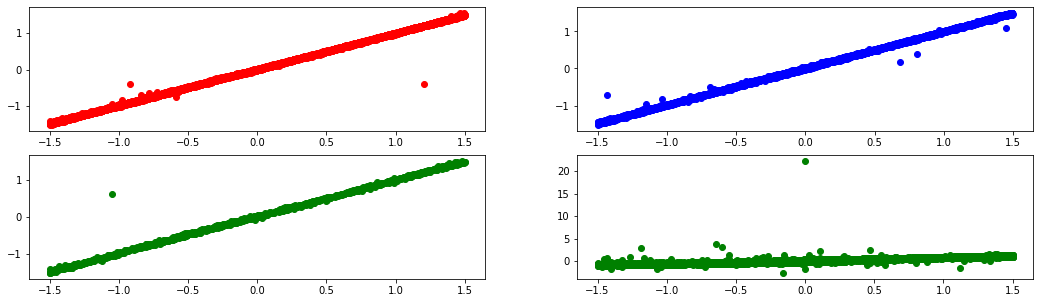

In [42]:
# PLots in case we have one label only

Xobs=rho
Xobs = preprocessing.StandardScaler().fit(Xobs).transform(Xobs.astype(float))
Xobs = Xobs.reshape(list(Xobs.shape) + [1])
yobs=cnn.predict(Xobs)

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)


vsini=[]
for i in np.arange(len(lst)):
    vsini.append(float(lst[i][51:54]))
grav=[]
for i in np.arange(len(lst)):
    grav.append(float(lst[i][42:46]))
temp=[]
for i in np.arange(len(lst)):
    temp.append(float(lst[i][35:41]))
meta=[]
for i in np.arange(len(lst)):
    meta.append(float(lst[i][67:73]))

vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))
temp2=[]
for i in np.arange(len(lst2)):
    temp2.append(float(lst2[i][35:41]))
meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))

y_hat = cnn.predict(X_train)
y_pred = cnn.predict(X_test)



fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))

ax[0,0].plot(y_train,y_hat,'ro', label='Train')
ax[0,1].plot(y_test,y_pred,'bo', label='Test')
ax[1,0].plot(meta,yobs,'go', label='Obs')
ax[1,1].plot(meta2,yobs2,'go', label='Obs')
plt.plot()



In [43]:

def get_model_summary(model):
    stream = io.StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary_string = stream.getvalue()
    stream.close()
    return summary_string

model_summary_string = get_model_summary(cnn)


eval_train=(1/len(y_train))*((abs(y_hat-y_train)**2).sum())
eval_test=(1/len(y_test))*((abs(y_pred-y_test)**2).sum())
eval_obs=(1/len(meta))*((abs(yobs[:,0]-meta)**2).sum())
eval_obs2=(1/len(meta2))*((abs(yobs2[:,0]-meta2)**2).sum())

print("evaluation Training", eval_train**0.5)
print("evaluation Validation", eval_test**0.5)
print("evaluation Observation", eval_obs**0.5)
print("evaluation Observation2", eval_obs2**0.5)


o=open("Evaluation_CNN","a")
o.write("\n"+str(model_summary_string)+"\n")
o.write("Evaluation Training"  +"\t"+str(eval_train**0.5)+"\n" \
        +"Evaluation Validation"  +"\t"+str(eval_test**0.5)+"\n" \
        +"Evaluation Observation"  +"\t"+str(eval_obs**0.5)+"\n" \
       +"Evaluation Observation2"  +"\t"+str(eval_obs2**0.5)+"\n") 
o.close()

evaluation Training 0.018834706759911137
evaluation Validation 0.023680638331674605
evaluation Observation 0.05814354223465192
evaluation Observation2 0.36389896180674824


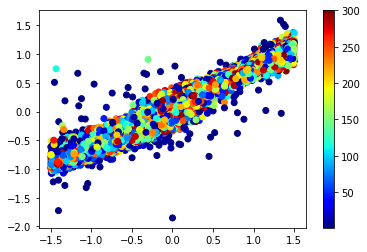

[0.28902224]


In [48]:


Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)
vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))

meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))
temp2=np.array(temp2)
yobs2=np.array(yobs2)
meta2=np.array(meta2)
sn2=np.array(sn2)
vsini2=np.array(vsini2)
grav2=np.array(grav2)
#_______________________
mask=(sn2>1)&(vsini2<301)&(temp2>=7000)&(grav2>=2.0)
#-------------------------

vin=meta2[mask]
ys=yobs2[mask]
c2=sn2[mask]
plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet))

eval_obs2=0
for i in np.arange(len(vin)):
    eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
eval_obs2=eval_obs2/len(vin)
eval_obs2=eval_obs2**0.5

plt.show()
print(eval_obs2)



## Iteration on all the parameters together

In [49]:
y=np.zeros((nmod, 4))

for i in np.arange(nmod):
    y[i][0]=teff[i]
    y[i][1]=logg[i]
    y[i][2]=vrot[i]
    y[i][3]=metal[i]
#    y[i][3]=SN[i]
 
    
    
out_dim=y.shape[1]   
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
#y=np.array(teff)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

X = X.reshape(list(X.shape) + [1])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Targets have the dimension of  (22011, 4)
The features have the dimension of (22011, 50)
Train set: (17608, 50, 1) (17608, 4)
Test set: (4403, 50, 1) (4403, 4)


In [50]:
cnn = Sequential()
cnn.add(layers.InputLayer(input_shape=X_train.shape[1:]))
cnn.add(layers.Conv1D(8, kernel_size=4, activation='relu', padding="same"))
cnn.add(Dropout(0.5))
cnn.add(layers.Conv1D(4, kernel_size=4, activation='relu', padding="same"))
cnn.add(Dropout(0.4))
cnn.add(layers.Conv1D(4, kernel_size=4, activation='relu', padding="same"))
cnn.add(Dropout(0.3))
rho2
#cnn.add(layers.MaxPooling1D(pool_size=4,strides=1, padding='valid'))
cnn.add(Flatten())
cnn.add(Dense(units = 1024, activation = 'relu',kernel_initializer='he_normal'))
cnn.add(Dense(units = 512, activation = 'relu'))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dense(units = 10, activation = 'relu'))

cnn.add(Dense(units = out_dim, activation = 'linear'))
cnn.compile(loss="mse", optimizer="adam",metrics=["accuracy"])
#history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), batch_size=64,epochs=50,callbacks=[early_stopping])
#mk=cnn.predict(X_train)
#print(mk.shape)

cnn.summary()
#plot_model(model)
#history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=32,callbacks=[early_stopping])
history = cnn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

#play a sound when done
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 50, 8)             40        
_________________________________________________________________
dropout_15 (Dropout)         (None, 50, 8)             0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 50, 4)             132       
_________________________________________________________________
dropout_16 (Dropout)         (None, 50, 4)             0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 50, 4)             68        
_________________________________________________________________
dropout_17 (Dropout)         (None, 50, 4)             0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 200)              

Epoch 42/100
276/276 [==============================] - 2s 8ms/step - loss: 53204.0117 - accuracy: 1.0000 - val_loss: 19669.3105 - val_accuracy: 1.0000
Epoch 43/100
276/276 [==============================] - 2s 8ms/step - loss: 53542.8438 - accuracy: 1.0000 - val_loss: 24792.5410 - val_accuracy: 1.0000
Epoch 44/100
276/276 [==============================] - 2s 8ms/step - loss: 53635.4102 - accuracy: 1.0000 - val_loss: 22192.1172 - val_accuracy: 1.0000
Epoch 45/100
276/276 [==============================] - 2s 8ms/step - loss: 49783.2695 - accuracy: 1.0000 - val_loss: 20159.7500 - val_accuracy: 1.0000
Epoch 46/100
276/276 [==============================] - 2s 8ms/step - loss: 49848.7656 - accuracy: 1.0000 - val_loss: 21041.7695 - val_accuracy: 1.0000
Epoch 47/100
276/276 [==============================] - 2s 8ms/step - loss: 50233.2969 - accuracy: 1.0000 - val_loss: 21230.3848 - val_accuracy: 1.0000
Epoch 48/100
276/276 [==============================] - 2s 8ms/step - loss: 48547.2891 -

Epoch 96/100
276/276 [==============================] - 2s 8ms/step - loss: 25478.8906 - accuracy: 1.0000 - val_loss: 11082.5654 - val_accuracy: 1.0000
Epoch 97/100
276/276 [==============================] - 2s 8ms/step - loss: 25914.5000 - accuracy: 1.0000 - val_loss: 8714.6797 - val_accuracy: 1.0000
Epoch 98/100
276/276 [==============================] - 2s 8ms/step - loss: 24816.2871 - accuracy: 1.0000 - val_loss: 10628.5537 - val_accuracy: 1.0000
Epoch 99/100
276/276 [==============================] - 2s 8ms/step - loss: 24503.5293 - accuracy: 1.0000 - val_loss: 9411.2314 - val_accuracy: 1.0000
Epoch 100/100
276/276 [==============================] - 2s 8ms/step - loss: 24177.8965 - accuracy: 1.0000 - val_loss: 9750.1709 - val_accuracy: 1.0000


0

[]

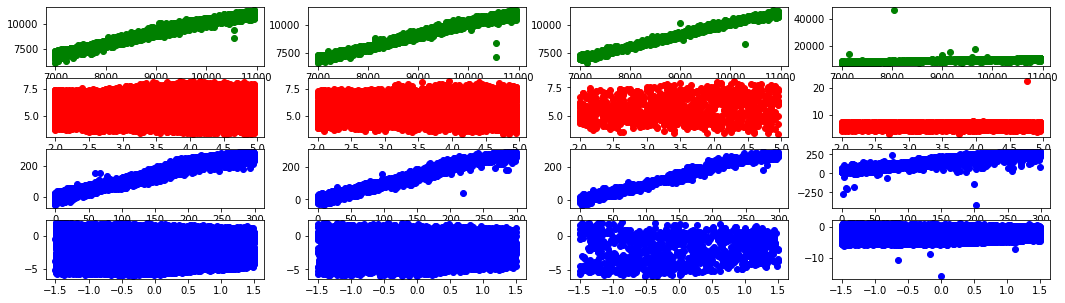

In [51]:

Xobs=rho
Xobs = preprocessing.StandardScaler().fit(Xobs).transform(Xobs.astype(float))
Xobs = Xobs.reshape(list(Xobs.shape) + [1])
yobs=cnn.predict(Xobs)

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
Xobs2 = Xobs2.reshape(list(Xobs2.shape) + [1])
yobs2=cnn.predict(Xobs2)



vsini=[]
for i in np.arange(len(lst)):
    vsini.append(float(lst[i][51:54]))
grav=[]
for i in np.arange(len(lst)):
    grav.append(float(lst[i][42:46]))
temp=[]
for i in np.arange(len(lst)):
    temp.append(float(lst[i][35:41]))
meta=[]
for i in np.arange(len(lst)):
    meta.append(float(lst[i][67:73]))

vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))
temp2=[]
for i in np.arange(len(lst2)):
    temp2.append(float(lst2[i][35:41]))
meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))

    
y_hat = cnn.predict(X_train)
y_pred = cnn.predict(X_test)




fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 5))
ax[0,0].plot(y_train[:,0],y_hat[:,0],'go', label='Train')
ax[0,1].plot(y_test[:,0],y_pred[:,0],'go', label='Test')
ax[0,2].plot(temp,yobs[:,0],'go', label='Obs')
ax[0,3].plot(temp2,yobs2[:,0],'go', label='Obs')


ax[1,0].plot(y_train[:,1],y_hat[:,1],'ro', label='Train')
ax[1,1].plot(y_test[:,1],y_pred[:,1],'ro', label='Test')
ax[1,2].plot(grav,yobs[:,1],'ro', label='Obs')
ax[1,3].plot(grav2,yobs2[:,1],'ro', label='Obs')


ax[2,0].plot(y_train[:,2],y_hat[:,2],'bo', label='Train')
ax[2,1].plot(y_test[:,2],y_pred[:,2],'bo', label='Test')
ax[2,2].plot(vsini,yobs[:,2],'bo', label='Obs')
ax[2,3].plot(vsini2,yobs2[:,2],'bo', label='Obs')

ax[3,0].plot(y_train[:,3],y_hat[:,3],'bo', label='Train')
ax[3,1].plot(y_test[:,3],y_pred[:,3],'bo', label='Test')
ax[3,2].plot(meta,yobs[:,3],'bo', label='Obs')
ax[3,3].plot(meta2,yobs2[:,3],'bo', label='Obs')


plt.plot()





In [52]:

print("For training")
print("for vrot", ((1/len(y_train))*((abs(y_hat[:,2]-y_train[:,2])**2).sum()))**0.5)
print("for logg", ((1/len(y_train))*((abs(y_hat[:,1]-y_train[:,1])**2).sum()))**0.5)
print("for Teff", ((1/len(y_train))*((abs(y_hat[:,0]-y_train[:,0])**2).sum()))**0.5)
print("for [Fe/H]", ((1/len(y_train))*((abs(y_hat[:,3]-y_train[:,3])**2).sum()))**0.5)

print("For Validation")
print("for vrot", ((1/len(y_pred))*((abs(y_pred[:,2]-y_test[:,2])**2).sum()))**0.5)
print("for logg", ((1/len(y_pred))*((abs(y_pred[:,1]-y_test[:,1])**2).sum()))**0.5)
print("for Teff", ((1/len(y_pred))*((abs(y_pred[:,0]-y_test[:,0])**2).sum()))**0.5)
print("for [Fe/H]", ((1/len(y_pred))*((abs(y_pred[:,3]-y_test[:,3])**2).sum()))**0.5)

print("For Observations")
print("for vrot", ((1/len(vsini))*((abs(yobs[:,2]-vsini)**2).sum()))**0.5)
print("for vrot", ((1/len(vsini2))*((abs(yobs2[:,2]-vsini2)**2).sum()))**0.5)

print("for logg", ((1/len(grav))*((abs(yobs[:,1]-grav)**2).sum()))**0.5)
print("for logg", ((1/len(grav2))*((abs(yobs2[:,1]-grav2)**2).sum()))**0.5)

print("for Teff", ((1/len(temp))*((abs(yobs[:,0]-temp)**2).sum()))**0.5)
print("for Teff", ((1/len(temp2))*((abs(yobs2[:,0]-temp2)**2).sum()))**0.5)

print("for [Fe/H]", ((1/len(meta))*((abs(yobs[:,3]-meta)**2).sum()))**0.5)

print("for [Fe/H]", ((1/len(meta2))*((abs(yobs2[:,3]-meta2)**2).sum()))**0.5)








For training
for vrot 15.313995814978236
for logg 2.54245742653117
for Teff 184.58081227700177
for [Fe/H] 2.95421651711122
For Validation
for vrot 15.576051580351633
for logg 2.5555253597258023
for Teff 196.83218878721152
for [Fe/H] 2.9372404108168815
For Observations
for vrot 16.172647890654773
for vrot 30.313142877240697
for logg 2.560048522967763
for logg 2.4928000514280555
for Teff 199.01749032166816
for Teff 565.1895054219683
for [Fe/H] 2.9527140202282993
for [Fe/H] 2.8696903529124924
